# HIV Acquisition GWAS: update to TOPMed
Author: Jesse Marks

The HIV acquisition GWAS meta-analysis needs to reran with the cohorts updated using the TopMed reference panel. 
The cohorts involved in these meta-analyes are:
* UHS1–4 {AFR,EUR}
* VIDUS EUR
* WIHS 1 {AFR,AMR,EUR}
* WIHS2 EUR
* WIHS3 AFR


Some of these data have already been imputed. Here are those locations:
* VIDUS: s3://rti-shared/shared_data/post_qc/vidus/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001
* WIHS1: s3://rti-hiv/shared_data/post_qc/wihs1/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001
* WIHS2: s3://rti-hiv/shared_data/post_qc/wihs2/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001
* VIDUS: s3://rti-shared/shared_data/post_qc/vidus/genotype/array/imputed/minimac4_eagle2.4/1000g_p3/0001/eur/

For the others that have not already been imputed (UHS1—4 and WIHS3 samples) we will include those processing details in this notebook.

# UHS1–4
GitHub Issue: 97

EUR-specific results [here](https://github.com/RTIInternational/bioinformatics/issues/97#issuecomment-502126016).<br>
AFR-specific results [here](https://github.com/RTIInternational/bioinformatics/issues/97#issuecomment-504402052).

Need to impute these data to TOPMed.

## Download from TOPMed

### afr

#### autosomes

In [ ]:
ancestry=afr
study=uhs1234
passW='CZeUnyc99YUqm'
outD=/shared/rti-hiv/gwas/$study/data/acquisition/0001/genotype/$ancestry/
mkdir -p $outD/logs && cd $outD


####################################################################################################
####################################################################################################
# Quality-Control Report
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120913/241991692609e6865fd6470a3cd707a2 | bash
# Logs
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120920/b1e9e69db85b741e695a8ce7455d9b7e | bash
# QC Statistics
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120917/d50738da8cd083570f43e5695d409c4d | bash
# Imputation Results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120919/da17f000fb541d9af162343986fcc15c | bash
####################################################################################################
####################################################################################################

# inflate chr results
for file in *zip; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name unzip.$study.$ancestry.$file \
        --script_prefix unzip.imputed.$study.$ancestry.data \
        --mem 3 \
        --nslots 2 \
        --priority 0 \
        --program unzip -P "$passW" $file 
done

# we can remove the original imputed data from MIS after we inflate the zip files
rm -rf *zip

# upload to s3
aws s3 mv . s3://rti-shared/shared_data/post_qc/$study/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001/$ancestry/ --quiet --recursive &

#### chrx
```
1 valid VCF file(s) found.

Samples: 4025
Chromosomes: X
SNPs: 4581
Chunks: 16
Datatype: unphased
Build: hg19
Reference Panel: apps@topmed-r2@1.0.0 (hg38)
Population: all
Phasing: eagle
Mode: imputation
```

In [ ]:
ancestry=afr
study=uhs1234
passW='2$opYw6zGPNgrR'
outD=/shared/rti-hiv/gwas/$study/data/acquisition/0001/genotype/$ancestry/
mkdir -p $outD && cd $outD


####################################################################################################
####################################################################################################

# Quality-Control Report
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120829/e66376a65e6430b8b67f64809ddd0e2 | bash
# Logs
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120836/2718141986b3173e0fcf12fd7db2395b | bash
# QC Statistics
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120833/24a94a3e4112edcfd274624ca63c2b05 | bash
# Imputation Results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120835/4f082fbf518dad2507c3c9291469c397 | bash
####################################################################################################
####################################################################################################

# inflate chr results
for file in *zip; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name unzip.$study.$ancestry.$file \
        --script_prefix unzip.imputed.$study.$ancestry.data \
        --mem 3 \
        --nslots 2 \
        --priority 0 \
        --program unzip -P "$passW" $file 
done

# we can remove the original imputed data from MIS after we inflate the zip files
rm -rf *zip

# upload to s3
aws s3 mv . s3://rti-shared/shared_data/post_qc/$study/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001/$ancestry/ --quiet --recursive &

### eur

#### autosomes
```
22 valid VCF file(s) found.

Samples: 3023
Chromosomes: 10 11 12 13 14 15 16 17 18 19 1 20 21 22 2 3 4 5 6 7 8 9
SNPs: 326396
Chunks: 290
Datatype: unphased
Build: hg19
Reference Panel: apps@topmed-r2@1.0.0 (hg38)
Population: all
Phasing: eagle
Mode: imputation
```

In [ ]:
ancestry=eur
study=uhs1234
passW='F_EHG/h5zPg0wo'
outD=/shared/rti-hiv/gwas/$study/data/acquisition/0001/genotype/$ancestry/
mkdir -p $outD && cd $outD


####################################################################################################
####################################################################################################

# Quality-Control Report
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120892/f19fb2628abf132ef01b0dadb8142f08 | bash
# Logs
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120899/d9b5eed70a4741c02010d6efe9672293 | bash
# QC Statistics
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120896/1c15d805474ea60b4c0a41b15981909c | bash
# Imputation Results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120898/5cfecb6b471015b6a251cf8a0f74bdfd | bash
####################################################################################################
####################################################################################################

# inflate chr results
for file in chr_{1..22}.zip; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name unzip.$study.$ancestry.$file \
        --script_prefix unzip.imputed.$study.$ancestry.data \
        --mem 3 \
        --nslots 2 \
        --priority 0 \
        --program unzip -P "$passW" $file 
done

# we can remove the original imputed data from MIS after we inflate the zip files
rm -rf *zip

# upload to s3
aws s3 sync . s3://rti-shared/shared_data/post_qc/$study/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001/$ancestry/ --quiet &

#### chrx
```
1 valid VCF file(s) found.

Samples: 3021
Chromosomes: X
SNPs: 3251
Chunks: 16
Datatype: unphased
Build: hg19
Reference Panel: apps@topmed-r2@1.0.0 (hg38)
Population: all
Phasing: eagle
Mode: imputation
```

In [ ]:
ancestry=eur
study=uhs1234
passW='FvWnr>HybGFe89'
outD=/shared/rti-hiv/gwas/$study/data/acquisition/0001/genotype/$ancestry/
mkdir -p $outD && cd $outD


####################################################################################################
####################################################################################################

# Quality-Control Report
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120850/d8ee9b147036df5d4ae1adff738bb8 | bash
# Logs
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120857/fce9b950b42286321eb3379fd4423e58 | bash
# QC Statistics
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120854/d8feec232dec890696cca7ac6f4b7960 | bash
# Imputation Results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/120856/a1618fca289ffefd55fd5f298f904b89 | bash
####################################################################################################
####################################################################################################

# inflate chr results
for file in *zip; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name unzip.$study.$ancestry.$file \
        --script_prefix unzip.imputed.$study.$ancestry.data \
        --mem 3 \
        --nslots 2 \
        --priority 0 \
        --program unzip -P "$passW" $file 
done

# we can remove the original imputed data from MIS after we inflate the zip files
rm -rf *zip

# upload to s3
aws s3 sync . s3://rti-shared/shared_data/post_qc/$study/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001/$ancestry/ --quiet &

## Data Wrangling
Process phenotype files to correct format.

In [ ]:
mkdir -p /shared/rti-hiv/gwas/uhs1234/data/acquisition/0001/phenotype/{final,processing}
cd /shared/rti-hiv/gwas/uhs1234/data/acquisition/0001/phenotype/processing/

# download previous gwas files
aws s3 sync s3://rti-hiv/gwas/uhs1234/data/phenotype/final/ .
    
# view head of phenotype files
head uhs1234_ea_hiv_age_gender_PC1+PC9+PC10.txt
#iid hiv age gender PC1 PC9 PC10
#260524@1054753970_260524@1054753970 0 44 0 0.0049 7e-04 0.001
#245@1064714500_245@1064714500 0 26 1 -0.0127 0.001 0.0029
#266@1064714555_266@1064714555 0 48 1 -0.0145 3e-04 -0.0033

head uhs1234_aa_hiv_age_gender_PC10+PC9+PC2+PC6.txt
#iid hiv age gender PC10 PC9 PC2 PC6
#109@1064714572_109@1064714572 0 26 1 0.0011 0.0075 0.0039 -3e-04
#202@1064714531_202@1064714531 0 27 0 0.0093 -0.0112 0.0023 0.0017
#312@1064714548_312@1064714548 0 34 1 -0.0012 -0.0012 4e-04 0.0173

# format phenotype files for rvtests
awk '
NR==1 {print "fid\tiid\tfatid\tmatid\tsex\thiv_status\tage\tPC1\tPC9\tPC10"}
NR>1 {print $1,$1,"NA","NA",$4,$2,$3,$5,$6,$7}' OFS="\t" \
uhs1234_ea_hiv_age_gender_PC1+PC9+PC10.txt > tmp_eur.tsv

awk '
NR==1 {print "fid\tiid\tfatid\tmatid\tsex\thiv_status\tage\tPC10\tPC9\tPC2\tPC6"}
NR>1 {print $1,$1,"NA","NA",$4,$2,$3,$5,$6,$7,$8}' OFS="\t" \
uhs1234_aa_hiv_age_gender_PC10+PC9+PC2+PC6.txt > tmp_afr.tsv

# map sex and status variables
awk '
NR==1 {print $0}
NR > 1 {
    if ($5 == 0) {
        $5 = 2
    }
    $6 = ($6 + 1)
    { print $0}
}'  OFS="\t" tmp_afr.tsv > ../final/uhs1234_afr_hiv_status_age_sex_pcs.tsv

awk '
NR==1 {print $0}
NR > 1 {
    if ($5 == 0) {
        $5 = 2
    }
    $6 = ($6 + 1)
    { print $0}
}'  OFS="\t" tmp_eur.tsv > ../final/uhs1234_eur_hiv_status_age_sex_pcs.tsv

# upload to s3
cd ../final/
aws s3 cp uhs1234_eur_hiv_status_age_sex_pcs.tsv s3://rti-hiv/gwas/uhs1234/data/acquisition/0001/phenotype/
aws s3 cp uhs1234_afr_hiv_status_age_sex_pcs.tsv s3://rti-hiv/gwas/uhs1234/data/acquisition/0001/phenotype/

In [ ]:
cd /shared/rti-hiv/gwas/wihs3/data/acquisition/0001/phenotype
aws s3 sync s3://rti-hiv/gwas/wihs3/data/phenotype/0001/final/ .
    
awk 'NR==1 { print "fid","iid","fatid","matid", "sex","age", "hiv_status","PC3","PC8","PC2" } 
  NR>1 {print $1,$1,"NA","NA",$4,$3,$2,$5,$6,$7}' \
  wihs3_aa_hiv_age_sex_PC3+PC8+PC2.txt > wihs3_afr_tmp.txt
    
awk 'NR==1 {print $0} NR > 1 {
  $7 = ($7 + 1)
  {print $0}}' wihs3_afr_tmp.txt > wihs3_afr_hiv_status_age_sex_pcs.txt

awk 'NR==1 { print "fid","iid","fatid","matid", "sex","age", "hiv_status","PC9","PC7","PC2", "PC10"} 
  NR>1 {print $1,$1,"NA","NA",$4,$3,$2,$5,$6,$7,$8}' \
  wihs3_ea_hiv_age_sex_PC9+PC7+PC2+PC10.txt > wihs3_eur_tmp.txt
    
awk 'NR==1 {print $0} NR > 1 {
  $7 = ($7 + 1)
  {print $0}}' wihs3_eur_tmp.txt > wihs3_eur_hiv_status_age_sex_pcs.txt


#convert to tab
awk '$1=$1 {print $0}' OFS="\t" wihs3_afr_hiv_status_age_sex_pcs.txt > wihs3_afr_hiv_status_age_sex_pcs.tsv
awk '$1=$1 {print $0}' OFS="\t" wihs3_eur_hiv_status_age_sex_pcs.txt > wihs3_eur_hiv_status_age_sex_pcs.tsv

# upload to S3
aws s3 cp wihs3_eur_hiv_status_age_sex_pcs.tsv s3://rti-hiv/gwas/wihs3/data/acquisition/0001/phenotype/
aws s3 cp wihs3_afr_hiv_status_age_sex_pcs.tsv s3://rti-hiv/gwas/wihs3/data/acquisition/0001/phenotype/

## Analysis Workflow

In [ ]:
# edit variables
project="rti-hiv"
phen=acquisition
study=uhs1234
ancestry=eur
version=0001

## Cloning this repo and biocloud_wdl_tools submodule together
cd /shared/
git clone --recurse-submodules https://github.com/RTIInternational/biocloud_gwas_workflows.git

# pull for any updates
cd /shared/biocloud_gwas_workflows
git pull
git submodule update --init --recursive


In [ ]:
# Create wf config file for afr, amr, and eur
mkdir -p /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/
cd /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/

cp /shared/biocloud_gwas_workflows/association_testing/rvtests/tests/test_rvtests_gwas_wf.json \
    /shared/bioinformatics/methods/rti-hiv/gwas/${study}/results/${phen}/0001/${ancestry}_assoc_wf.json

# Modify config settings manually with vim

# save commit 
mkdir -p /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/
cd /shared/biocloud_gwas_workflows/
git rev-parse HEAD > /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/git_hash.txt  
cd /shared/

# Zip biocloud_gwas_workflows repo
zip \
    --exclude=*/var/* \
    --exclude=*.git/* \
    --exclude=*/test/* \
    --exclude=*/.idea/* \
    -r /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip \
    biocloud_gwas_workflows/

cd /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/

# note to opens the listening port to the large cromwell server in another window
# ssh -i ~/.ssh/gwas_rsa -L localhost:8000:localhost:8000 ec2-user@18.212.159.244

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@/shared/biocloud_gwas_workflows/association_testing/rvtests/rvtests_gwas_wf.wdl" \
    -F "workflowInputs=@/shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}_assoc_wf.json" \
    -F "workflowDependencies=@/shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip"
# AFR Job ID: {"id":"4ab5177f-f9d7-4e65-8753-7ed0899b5678","status":"Submitted"}
# EUR Job ID: {"id":"31422c37-f893-4eea-a735-a12b2e6f7852","status":"Submitted"}

### Process results

In [1]:
%%bash 
declare -A gwas_array

afr_id="4ab5177f-f9d7-4e65-8753-7ed0899b5678"
eur_id="31422c37-f893-4eea-a735-a12b2e6f7852"
#amr_id=""

gwas_array[afr]="$afr_id" 
gwas_array[eur]="$eur_id"
#gwas_array[amr]="$amr_id"
  
study="uhs1234"
phen="acquisition"
version="0001"
project="hiv"




for ancestry in ${!gwas_array[@]}; do
    jobs=${gwas_array[$ancestry]}
    mkdir -p ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    cd ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    
    #Download output from Swagger UI.
    curl -X GET "http://localhost:8000/api/workflows/v1/$jobs/outputs" -H "accept: application/json" \
        > final_outputs_${jobs}.json

# note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o
        
with open('final_outputs_' + "$jobs" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(outputs[key])
                os.system(message)
EOF
                
    # Rename files
    for file in $(aws s3 ls s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
        finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
        
        aws s3 mv s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$file \
                  s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$finalFile
    done
done

copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/4ab5177f-f9d7-4e65-8753-7ed0899b5678/call-cat_sumstats/uhs1234_afr.rvtests.MetaAssoc.tsv to s3://rti-hiv/gwas/uhs1234/results/acquisition/0001/afr/uhs1234_afr.rvtests.MetaAssoc.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/4ab5177f-f9d7-4e65-8753-7ed0899b5678/call-summarize_filtered_sumstats/shard-0/SUM.summarize_gwas_wf/98a947b1-ff83-43aa-91eb-0a1f860173b9/call-filter_pvalue/uhs1234_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/uhs1234/results/acquisition/0001/afr/uhs1234_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/4ab5177f-f9d7-4e65-8753-7ed0899b5678/call-summarize_filtered_sumstats/shard-1/SUM.summarize_gwas_wf/725ee212-8d93-42a7-a6f9-92ad15d5f3f1/call-filter_pvalue/uhs1234_afr.rvtests.MetaAssoc.rsq.0.8.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/uhs1234/results/acquisition/0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9246  100  9246    0     0  15805      0 --:--:-- --:--:-- --:--:-- 15778
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9246  100  9246    0     0  49978      0 --:--:-- --:--:-- --:--:-- 50250


# VIDUS

## Phenotype Processing
Create phenotype files for rvtest. We follow the instructions of the NGC protocol distributed by Eric Johnson. This protocol mandates that we create a phenotype file and a covariate file in PED format. See the NGC protocol for more information on this format. There are several initial filters and processing steps to be applied to the subject data.

* extract ids of subjects passing genotype QC
* phenotype variables of interest
`gwas_code, DOB_YYYY, female, hiv`

Map sex coding and hiv status per the NGC protocol, to 1=female & 2=male. Currently, the mapping 0's and 1's.

In [ ]:
# download genotype data
for ext in {fam,bed,bim}; do
    aws s3 cp s3://rti-shared/shared_data/post_qc/vidus/genotype/array/observed/0002/eur/vidus_no_sex_discrepancies.$ext.gz .
done
gunzip * 

# download phenotype file
cd /shared/rti-hiv/gwas/vidus/data/0001/phenotype/
aws s3 cp s3://rti-hiv/gwas/vidus/data/acquisition/GWAS-Cohort-n938_passed_g_qc_only_HIV_status_baseline.csv .
    
head GWAS-Cohort-n938_passed_g_qc_only_HIV_status_baseline.csv
#gwas_code,female,hiv,ageatint
#1,0,0,55
#2,0,1,59
#3,0,1,55
#4,0,1,54


# add trailing zeros to entries in phenotype gwas_code to match genotype data code
awk -F "," 'NR>=2{ $1 = sprintf("%04d", $1) } {print $1,$2,$3,$4}' \
  GWAS-Cohort-n938_passed_g_qc_only_HIV_status_baseline.csv  > vidus_eur_phenotype_table.txt

# map sex (2=female)
awk '{ if ($2==0) { $2=1}  else { $2=2}}1 ' vidus_eur_phenotype_table.txt >\
  vidus_eur_phenotype_table_sex_mapped.txt

# map hiv status (2=case)
awk 'NR>=2{if ($3==1) {$3=2} else{$3=1}}1' vidus_eur_phenotype_table_sex_mapped.txt >\
  vidus_eur_phenotype_table_sex_hiv_mapped.txt

# filter to those with genotype data
awk 'NR==FNR {tail=substr($1,length($1)-3 ); map[tail] = $1; next}
    FNR==1 {print $0}
    FNR>=2 {
        if ($1 in map){
            print map[$1], $2, $3, $4
        }
    } ' ../genotype/observed/vidus_no_sex_discrepancies.fam \
    vidus_eur_phenotype_table_sex_hiv_mapped.txt >\
    vidus_eur_phenotype_table_sex_hiv_id_mapped.txt

# format phenotype file for rvtests
awk 'NR==1{
print "fid\tiid\tfatid\tmatid\tsex\thiv_status\tage"
}
NR>1 {
    print $1, $1, "NA", "NA", $2, $3,$4
}' OFS="\t" vidus_eur_phenotype_table_sex_hiv_id_mapped.txt >\
    vidus_eur_phenotype_table_sex_hiv_id_mapped_formatted.txt

## PCA
Genotype PCA

In [ ]:
cd /shared/rti-hiv/gwas/wihs2/data/0001/phenotype

# add phenotype info to genotype data
# filter genotype data to subjects with phenotype data
awk 'NR==FNR {map[$1] = $6; next}
    FNR>=1 {
    if ($1 in map) {
        $6 = map[$1];
    }}1' vidus_eur_phenotype_table_sex_hiv_id_mapped_formatted.txt \
     ../genotype/observed/vidus_no_sex_discrepancies.fam  > \
    vidus_eur_phenotype_mapped.fam
    
awk 'NR==FNR {map[$1] = $6; next}
    FNR>=1 {
    if ($1 in map) {
        print $1,$1
    }}' vidus_eur_phenotype_table_sex_hiv_id_mapped_formatted.txt \
     ../genotype/observed/vidus_no_sex_discrepancies.fam  > \ vidus_keep.txt

# create plink genotype set
mkdir -p /shared/rti-hiv/gwas/wihs2/data/0001/phenotype/eur

docker run -v "/shared/rti-hiv/gwas/vidus/data/0001/:/data/" \
rticode/plink:1.9 plink \
    --bed /data/genotype/observed/vidus_no_sex_discrepancies.bed \
    --bim /data/genotype/observed/vidus_no_sex_discrepancies.bim \
    --fam /data/phenotype/vidus_eur_phenotype_mapped.fam \
    --keep /data/phenotype/vidus_keep.txt \
    --make-bed \
    --out /data/phenotype/eur/vidus_eur_genotypes
    
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name vidus_pca \
    --script_prefix vidus_pca \
    --mem 6.8 \
    --nslots 1 \
    --priority 0 \
    --program bash /shared/bioinformatics/software/scripts/pca_eigenstrat_pipeline.sh \
        "eur" \
        "vidus" \
        "/shared/rti-hiv/gwas/vidus/data/0001/phenotype"


### View PCs

In [ ]:
# download PCA results and phenotype file to local
cd /home/jesse/Projects/hiv/gwas/vidus/data/acquisition/0001/phenotype/processing
scp -i ~/.ssh/gwas_rsa  ec2-user@34.195.174.206:/shared/rti-hiv/gwas/vidus/data/0001/phenotype/eur/eig/results/* .
scp -i ~/.ssh/gwas_rsa  ec2-user@34.195.174.206:/shared/rti-hiv/gwas/vidus/data/0001/phenotype/vidus_eur_phenotype_table_sex_hiv_id_mapped_formatted.txt .

In [7]:
### R console ###
# Load PCA data
setwd("~/Projects/hiv/gwas/vidus/data/acquisition/0001/phenotype/processing/")
options(stringsAsFactors = F)
eur_evec <- read.table("eur_ld_pruned.pca.evec", comment.char="#", sep="", row.names=1)
head(eur_evec[,1:5])

,V2,V3,V4,V5,V6
ID_1:ID_1,0.0131,-0.0001,0.0026,-0.0039,0.0045
ID_2:ID_2,-0.0332,-0.0135,-0.0007,0.0024,0.0116
ID_3:ID_3,0.0199,-0.0032,-0.0128,-0.0062,-0.0028
ID_4:ID_4,0.0086,-0.0057,-0.0030,0.0030,-0.0061
ID_5:ID_5,0.0124,-0.0005,-0.0008,-0.0083,-0.0014
ID_6:ID_6,0.0093,0.0155,0.0031,0.0024,0.0192


In [3]:
## R console ##
### View PCs ###

options(repr.plot.width=8, repr.plot.height=8)
par(oma = c(4, 1, 2, 1))

####################################################################################################

# Function for plotting off-diagonal scatterplots
plot.offdiag <- function(x, y, colors){
    #Make x and y axes equal
    limits <- c(min(x,y), max(x,y)) * 1.3
    par(usr = c(limits, limits))
    points(x,y, col=colors, pch=16)
}

# Function for plotting diagonal density plots
plot.diag <- function(x, colors){
    d <- density(x, bw=0.01, kernel="gaussian")
    #Update plot axes limits
    par(usr = c(range(d$x), range(d$y)*1.3))
    points(d$x,d$y, type="l")
    #Add PC values
    points(x=x, y=jitter(rep(mean(d$y),times=d$n),factor=5), col=colors, pch=16)
}


plot.pca <- function(case_control, case_col="blue", control_col="red", df_evec) {

    dspace <- df_evec[1:10] #transformed dataspace
    sample_status <- df_evec[,11] #case/control status
    
    if (case_control) {
            
        #Color label samples
        label_colors <- rep(NA, length(sample_status))
        label_colors[grepl(x=sample_status, pattern="Case", ignore.case=T)] <- case_col
        label_colors[grepl(x=sample_status, pattern="Control", ignore.case=T)] <- control_col
        legend_cols <- c(case_col, control_col)
        legend_names <- c(case_name, control_name)

    } else {
        
        # Color label samples
        label_colors <- case_col
        legend_cols <- case_col
        legend_names <- c(case_name)
        
    }
        #Redefine outer margin
        pairs(x=dspace[,1:5], panel=plot.offdiag, diag.panel=plot.diag, 
              labels=paste0("PC",1:5), label.pos=0.9, cex.labels=1.8, col=label_colors)
        par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
        plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main=study_title, cex.main=1)

        par(oma = c(4, 1, 2, 1))
        pairs(x=dspace[,6:10], panel=plot.offdiag, diag.panel=plot.diag, 
              labels=paste0("PC",6:10), label.pos=0.9, cex.labels=1.8, col=label_colors)
        par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
        plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main=study_title, cex.main=1)
        legend("bottom", c(case_name, control_name), 
               pch=19, col=legend_cols,
               xpd=TRUE, horiz=TRUE, inset=c(0,-0.02), 
               bty="n", cex=1)
}


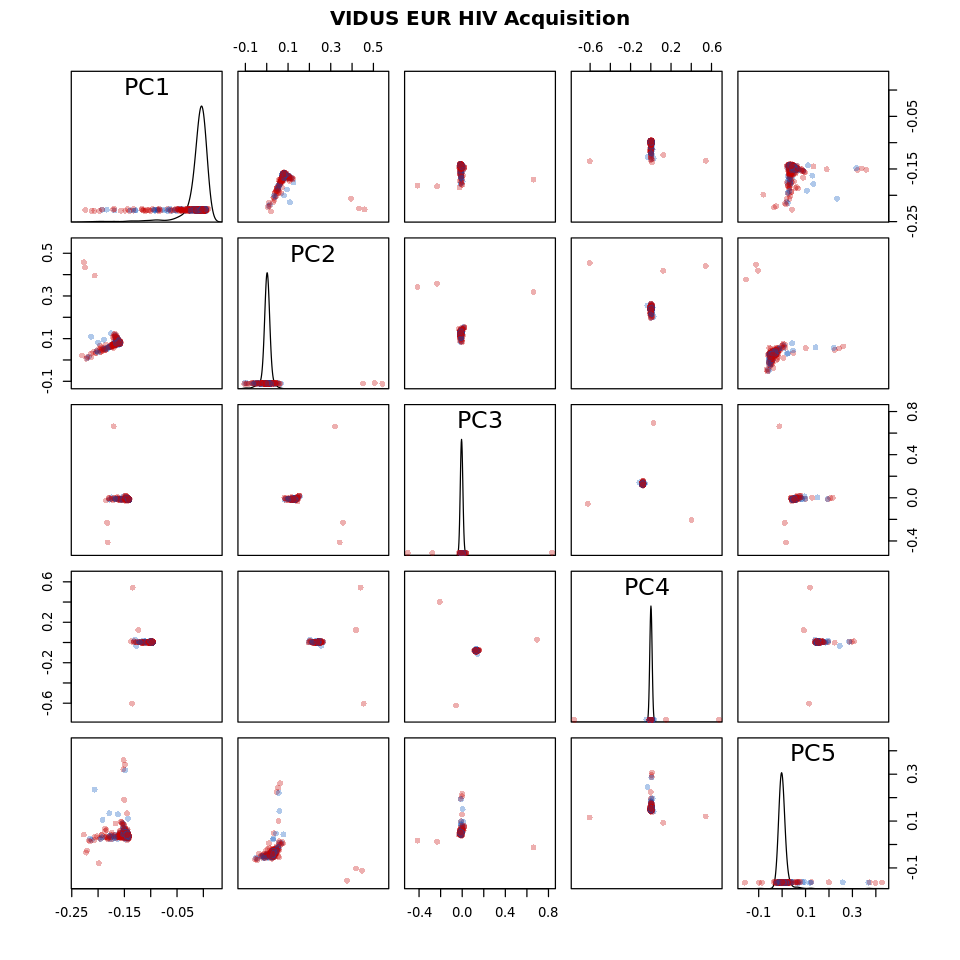

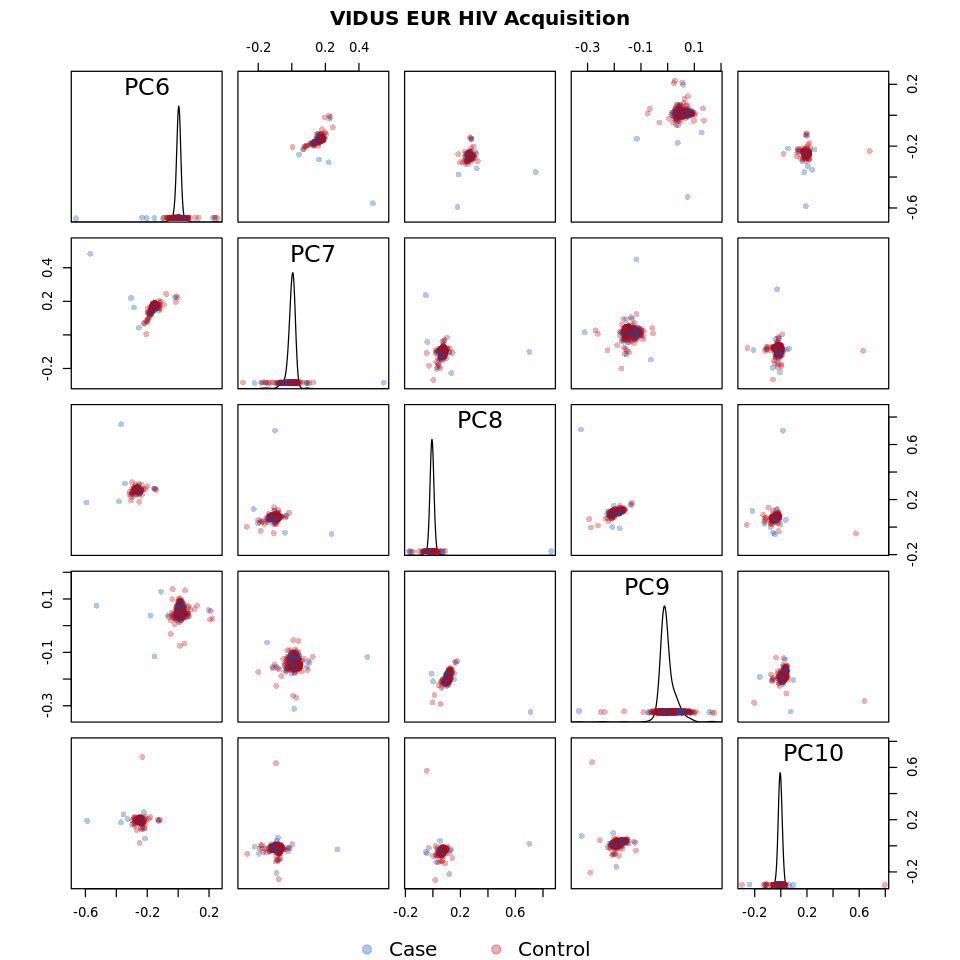

In [4]:
study_title <- "VIDUS EUR HIV Acquisition"
pop <- "eur"
case_control <- TRUE # TRUE or FALSE
case_name <- "Case" # for legend    Note, if not case/control then just edit this one
control_name <- "Control"  # for legend   Note, if not case/control then just leave as is
case_col <- rgb(0,80,190,80, maxColorValue=255) #blue   Note, if not case/control then just edit this one
control_col <- rgb(200,0,0,80, maxColorValue=255) #red  Note, if not case/control then just leave as is

# EUR
plot.pca(case_control = case_control,
        case_col = case_col,
        control_col = control_col,
        df_evec = eur_evec)

### PC Selection

In [25]:
### PC Selection ###
## R functions, DO NOT ALTER THIS CODE ##
create.pedfile <- function(phen_file, pca_file, phenotype, sex_var, covariates, study, ancestry, final_name){
    
    # INPUT:
    # phen_file - phenotype file input of the format "fid iid fatid matid sex age-cov other-cov phentype-name"
    
    # phenotype file
    pheno_data <- read.delim(phen_file, sep="")
    pca_data <- read.delim(pca_file, sep="")
    other_pedcols <- c("fid", "iid", "patid", "matid", sex_var)
    ped_width <- length(other_pedcols) + length(phenotype)
    ped_length <- nrow(pheno_data)
    ped_file <- data.frame(matrix(ncol=ped_width, nrow=ped_length))
    colnames(ped_file) <- c(other_pedcols, phenotype)
    ped_file[phenotype] <- pheno_data[phenotype]
    ped_file[sex_var] <- pheno_data[sex_var]
    ped_file["fid"] <- pheno_data[1]
    ped_file["iid"] <- pheno_data[2]
    
    # master phenotype file & separate covariate file
    nphen_cols <- 15 + length(covariates)
    ncov_cols <- 14 + length(covariates)
    master_phen <- data.frame(matrix(ncol=nphen_cols, nrow=ped_length))
    covar_data <- data.frame(matrix(ncol=ncov_cols, nrow=ped_length))
    colnames(master_phen) <- c("fid", "iid", "patid", "matid", covariates, phenotype,
                             "PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")
    colnames(covar_data) <- c("fid", "iid", "patid", "matid", covariates,
                             "PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")
    
    master_phen[,1:4] <- ped_file[, 1:4]
    covar_data[,1:4] <- ped_file[, 1:4]
    for (i in covariates){
        master_phen[,i] <- pheno_data[,i]
        covar_data[,i] <- pheno_data[,i]
    }
    master_phen[,phenotype] <- ped_file[phenotype]
    
    master_phen[, (nphen_cols-9):nphen_cols] <- pca_data[,3:12]
    covar_data[, (ncov_cols-9):ncov_cols] <- pca_data[,3:12]
    
    dir.create("../final/")
    write.table(master_phen, paste("../final/", final_name, sep=""), sep = "\t", row.names = F, quote=F)
    write.table(ped_file, paste(study,"_", ancestry, "_phen.ped", sep=""), sep = "\t", row.names = F, quote=F)
    write.table(covar_data, paste(study,"_", ancestry, "_cov.ped", sep=""), sep = "\t", row.names = F, quote=F)
} # end function

regression.analysis <- function(cov_file, phen_file, phenotype_name, model_type, ancestry, coded_01){
    options(stringsAsFactors=F)
    
    ancestry <- toupper(ancestry) # for graph titles
    cov_data <- read.delim(cov_file, sep="")
    phen_data <- read.delim(phen_file, sep="")
    pc_names <- paste0("PC", 1:10)
    merge_data <- merge(x=phen_data[,c("iid", phenotype_name)], y=cov_data[, c("iid", pc_names)], by="iid")
    
    model.str <- paste0(phenotype_name, "~", paste(pc_names, collapse=" + ")) 
    cat("MODEL FORMULA:\n\n", model.str, "\n")
    
    # Get model fits
    if (model_type=="continuous"){
        model_fit <- lm(formula=as.formula(model.str), data=merge_data)
        pve_calc <- "Mean Sq"
    }
    else if (model_type=="logistic"){
        if (!coded_01) {
            merge_data[,phenotype_name] <- merge_data[,phenotype_name] - 1
        }
        model_fit <- glm(formula=as.formula(model.str), data=merge_data, family=binomial(link="logit"))
        pve_calc <- "Deviance"
    }
    # Get sequential (type I) sum of squares
    anova_model <- anova(model_fit)
    
    # Calculate percent variance explained and sort
    variance_explained <- cbind(anova_model[pc_names,], 
                    PVE=round(anova_model[pc_names, pve_calc]/sum(anova_model[pc_names, pve_calc])*100, digits=2))
    pve_sorted <- variance_explained[order(variance_explained$PVE, decreasing=T),]
    
    # Output regression info
    cat(paste("\n\n================", ancestry,  "group ================\n"))
    summary(model_fit)
    pve_sorted
    
    # Percent Variance Explained Visualization
    options(repr.plot.width=13, repr.plot.height=5)

    # Set graphical parameters
    cex.factor <- 0.9
    barplot_ylim <- c(0, max(variance_explained$PVE)*1.2)

    pv_list <- vector(length = 10)
    total <- 0
    for (i in 1:nrow(pve_sorted)){
        pv_list[i] <- row.names(pve_sorted[i,])
        total <- total + pve_sorted[i, "PVE"]
        #print(total)
        if (total >= 75) break
    }

    topPCs <- pv_list[which(pv_list != "FALSE")]
    cat("Top PCs: ",topPCs, "\n")
    cat(paste("PVE:     ", total))

    # Visualize PVE
    par(mfrow=c(1,2))
    barplot(height=variance_explained$PVE, names.arg=rownames(variance_explained), beside=T, cex.names=cex.factor, 
            col="red3", border="red3", ylim=barplot_ylim, 
            main=paste(ancestry,"Percent Variance Explained"), ylab="PVE")
    plot(cumsum(variance_explained$PVE), type="b", main=paste(ancestry, "PVE Cumulative Sum"), ylab="PVE", 
         lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
    axis(side=1, at=c(1:10), labels=rownames(variance_explained), cex.axis=cex.factor)

    par(mfrow=c(1,2))
    barplot(height=pve_sorted$PVE, names.arg=rownames(pve_sorted), beside=T, cex.names=cex.factor, 
            col="red3", border="red3", ylim=barplot_ylim, main=paste(ancestry,"Percent Variance Explained (Sorted PCs)"), ylab="PVE")
    plot(cumsum(pve_sorted$PVE), type="b", main=paste(ancestry,"PVE Cumulative Sum (Sorted PCs)"), ylab="PVE", 
         lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
    axis(side=1, at=c(1:10), labels=rownames(pve_sorted), cex.axis=cex.factor)
}

MODEL FORMULA:

 hiv_status~PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 


================ EUR group ================
Top PCs:  PC7 PC3 PC6 
PVE:      86.66

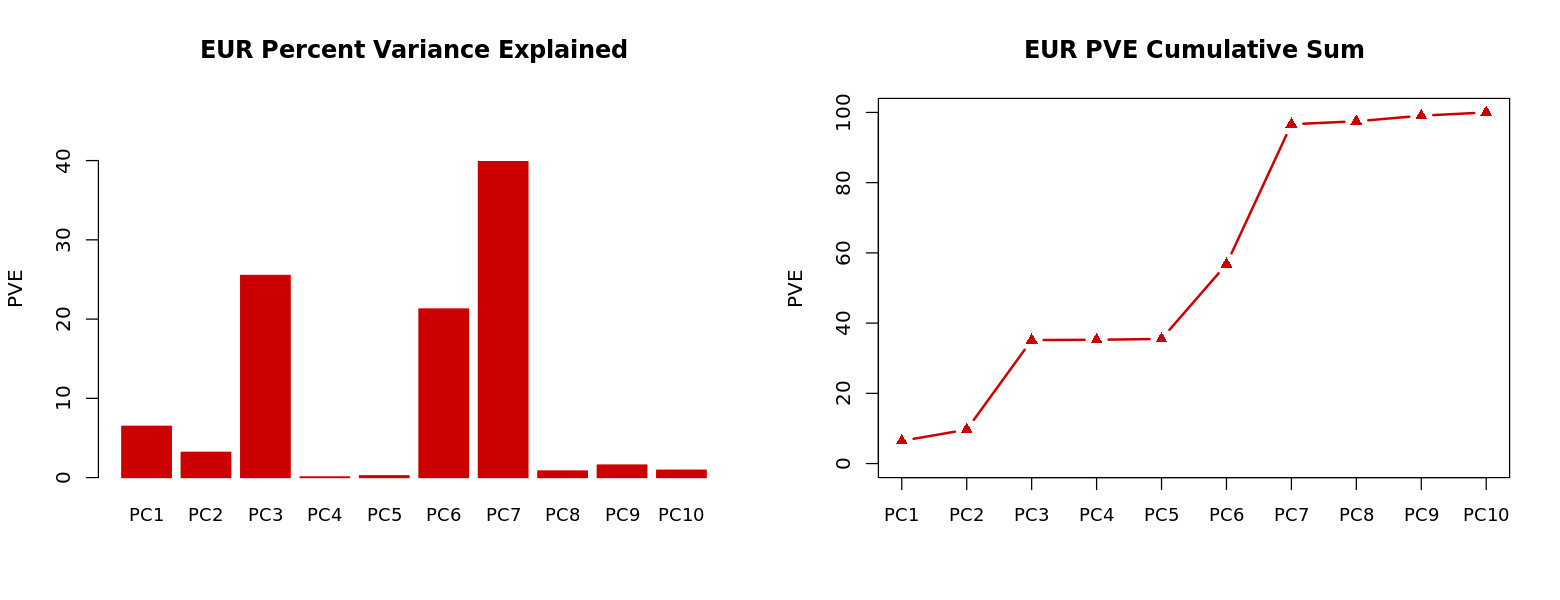

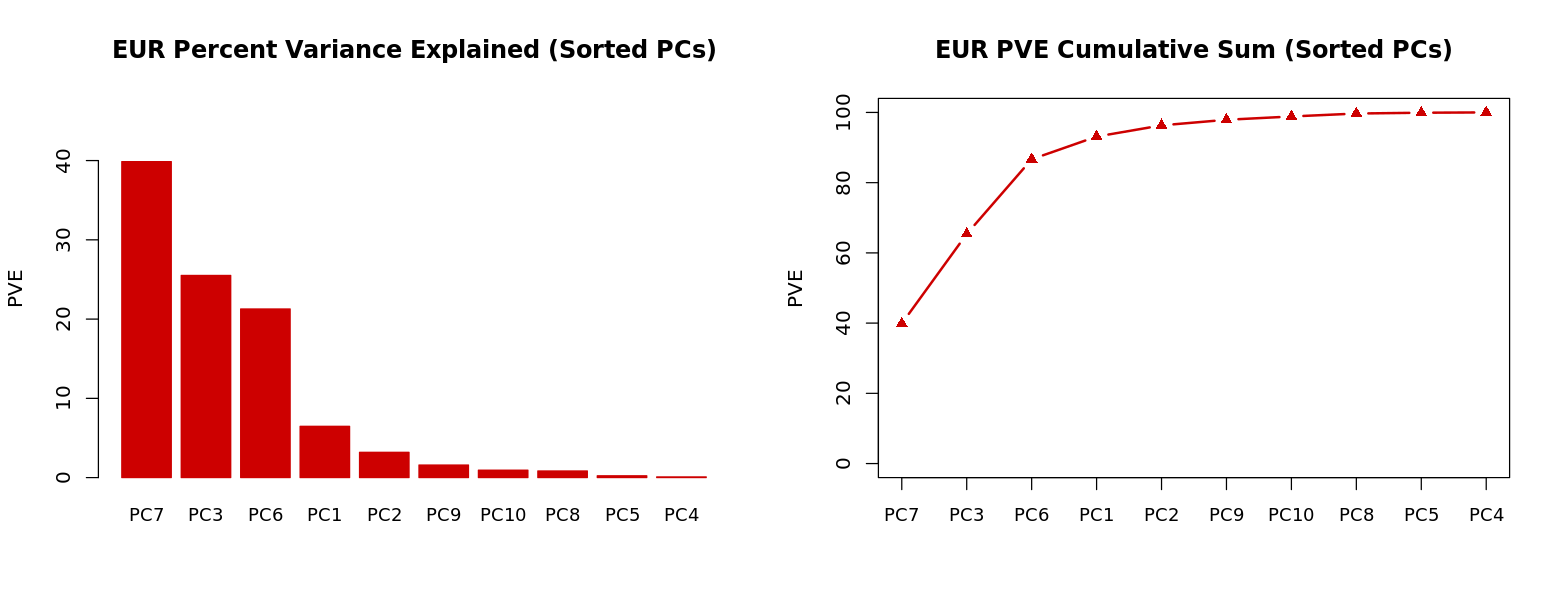

In [26]:
## EUR

study <- "vidus_hiv_acquisition" # for file naming
ancestry <- "eur" # eur, afr, or amr

## variable information from phenotype file ($study_$an_phenotype_table.txt)
phenotype <- "hiv_status" 
sex_var <-  "sex" 
covs <- c(sex_var, "age") # add other covariates

phen_file <- "vidus_eur_phenotype_table_sex_hiv_id_mapped_formatted.txt"
final_name <- "vidus_eur_hiv_status_age_sex_pcs.tsv"  # output phenotype file with merged pcs (separate ped files are created too)
pca_file <- "eur_ld_pruned_top10_eigenvecs.txt"

model_type <- "logistic" # continuous or logistic (if log then must be coded 0 or 1)
coded_01 <- FALSE  # TRUE or FALSE. Are case/controls coded as 0's and 1's? (FALSE if coded as 1's and 2's)
####################################################################################################
####################################################################################################

cov2 <- paste(study, ancestry, "cov.ped", sep="_")
phen2 <- paste(study, ancestry, "phen.ped", sep="_")

create.pedfile(phen_file=phen_file, pca_file=pca_file, phenotype=phenotype,
               sex_var=sex_var, covariates=covs, study=study, ancestry=ancestry, 
               final_name=final_name)
regression.analysis(cov_file=cov2, phen_file=phen2,
                    phenotype_name=phenotype, model_type=model_type,
                    ancestry=ancestry,
                    coded_01)


In [ ]:
cd /home/jesse/Projects/hiv/gwas/vidus/data/acquisition/0001/phenotype/final/

# change id to id_id to match genotype data
cat vidus_eur_hiv_status_age_sex_pcs.tsv  | awk ' 
NR>=2 {
$1=$1"_"$1; $2=$2"_"$2
}
{print $0}' OFS="\t" > tmp && mv tmp vidus_eur_hiv_status_age_sex_pcs.tsv

# upload to S3
aws s3 cp vidus_eur_hiv_status_age_sex_pcs.tsv  s3://rti-hiv/gwas/vidus/data/acquisition/0001/phenotype/

## Analysis Workflow

In [ ]:
# edit variables
project="rti-hiv"
phen=acquisition
study=vidus
ancestry=eur
version=0001

## Cloning this repo and biocloud_wdl_tools submodule together
cd /shared/
git clone --recurse-submodules https://github.com/RTIInternational/biocloud_gwas_workflows.git

# pull for any updates
cd /shared/biocloud_gwas_workflows
git pull
git submodule update --init --recursive


In [ ]:
# Create wf config file for afr, amr, and eur
mkdir -p /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/
cd /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/

cp /shared/biocloud_gwas_workflows/association_testing/rvtests/tests/test_rvtests_gwas_wf.json \
    /shared/bioinformatics/methods/rti-hiv/gwas/${study}/results/${phen}/0001/${ancestry}_assoc_wf.json

# Modify config settings manually with vim

# save commit 
mkdir -p /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/
cd /shared/biocloud_gwas_workflows/
git rev-parse HEAD > /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/git_hash.txt  
cd /shared/

# Zip biocloud_gwas_workflows repo
zip \
    --exclude=*/var/* \
    --exclude=*.git/* \
    --exclude=*/test/* \
    --exclude=*/.idea/* \
    -r /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip \
    biocloud_gwas_workflows/

cd /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/

# note to opens the listening port to the large cromwell server in another window
# ssh -i ~/.ssh/gwas_rsa -L localhost:8000:localhost:8000 ec2-user@18.212.159.244

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@/shared/biocloud_gwas_workflows/association_testing/rvtests/rvtests_gwas_wf.wdl" \
    -F "workflowInputs=@/shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}_assoc_wf.json" \
    -F "workflowDependencies=@/shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip"
# EUR Job ID: {"id":"9a524ec2-02da-4d43-8716-1f550743a7ae","status":"Submitted"}

### Process results

In [1]:
%%bash 
declare -A gwas_array

#afr_id=""
eur_id="9a524ec2-02da-4d43-8716-1f550743a7ae"
#amr_id=""

#gwas_array[afr]="$afr_id" 
gwas_array[eur]="$eur_id"
#gwas_array[amr]="$amr_id"
  
study="vidus"
phen="acquisition"
version="0001"
project="hiv"




for ancestry in ${!gwas_array[@]}; do
    jobs=${gwas_array[$ancestry]}
    mkdir -p ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    cd ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    
    #Download output from Swagger UI.
    curl -X GET "http://localhost:8000/api/workflows/v1/$jobs/outputs" -H "accept: application/json" \
        > final_outputs_${jobs}.json

# note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o
        
with open('final_outputs_' + "$jobs" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(outputs[key])
                os.system(message)
EOF
                
    # Rename files
    for file in $(aws s3 ls s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
        finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
        
        aws s3 mv s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$file \
                  s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$finalFile
    done
done

copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/9a524ec2-02da-4d43-8716-1f550743a7ae/call-cat_sumstats/vidus_eur.rvtests.MetaAssoc.tsv to s3://rti-hiv/gwas/vidus/results/acquisition/0001/eur/vidus_eur.rvtests.MetaAssoc.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/9a524ec2-02da-4d43-8716-1f550743a7ae/call-summarize_filtered_sumstats/shard-0/SUM.summarize_gwas_wf/19ee1c14-4811-411a-99df-114afe356b13/call-filter_pvalue/vidus_eur.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/vidus/results/acquisition/0001/eur/vidus_eur.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/9a524ec2-02da-4d43-8716-1f550743a7ae/call-summarize_filtered_sumstats/shard-1/SUM.summarize_gwas_wf/594ebbb0-fc64-4b3a-bf71-4285b002259b/call-filter_pvalue/vidus_eur.rvtests.MetaAssoc.rsq.0.8.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/vidus/results/acquisition/0001/eur/vidus_eu

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9184  100  9184    0     0  20872      0 --:--:-- --:--:-- --:--:-- 20920


# WIHS1
Note that females comprise the entirety of the WIHS sample. So there is no need for a sex a covariate.

Previous phenotype files located at:
```
s3://rti-hiv/rti-midas-data/studies/wihs/phenotype/probabel/wihs1.aa.status.ageatbl.EVs.v1.gz
s3://rti-hiv/rti-midas-data/studies/wihs/phenotype/probabel/wihs1.ea.status.ageatbl.EVs.v1.gz
s3://rti-hiv/rti-midas-data/studies/wihs/phenotype/probabel/wihs1.ha.status.ageatbl.EVs.v1.gz
```
We will rename these files and store them at:
```
s3://rti-hiv/gwas/wihs1/data/acquisition/0001/phenotype/afr/wihs1_afr_hiv_acquisition_ageatbl_pcs.tsv
s3://rti-hiv/gwas/wihs1/data/acquisition/0001/phenotype/amr/wihs1_amr_hiv_acquisition_ageatbl_pcs.tsv
s3://rti-hiv/gwas/wihs1/data/acquisition/0001/phenotype/eur/wihs1_eur_hiv_acquisition_ageatbl_pcs.tsv
```

The genotype PCs to include as covariates in the model can be found in the following files. These contain the same data as in the above phenotype files except that are pruned down to only include the PCs that do in the model.
```
s3://rti-hiv/gwas/wihs1/pheno/pheno_hiv_aa
s3://rti-hiv/gwas/wihs1/pheno/pheno_hiv_ea
s3://rti-hiv/gwas/wihs1/pheno/pheno_hiv_ha
```
In particular, below is a breakdown of the specific PCs to include in the model
```
==> pheno_hiv_aa <==
uuid    status  ageatbl pc7     pc3     pc5     pc9

==> pheno_hiv_ea <==
uuid    status  ageatbl pc2     pc7     pc8     pc9

==> pheno_hiv_ha <==
uuid    status  ageatbl pc2
```

## Data wrangle

In [ ]:
cd /shared/rti-hiv/gwas/wihs1/data/phenotype/

aws s3 cp s3://rti-hiv/rti-midas-data/studies/wihs/phenotype/probabel/wihs1.aa.status.ageatbl.EVs.v1.gz .
aws s3 cp s3://rti-hiv/rti-midas-data/studies/wihs/phenotype/probabel/wihs1.ea.status.ageatbl.EVs.v1.gz .
aws s3 cp s3://rti-hiv/rti-midas-data/studies/wihs/phenotype/probabel/wihs1.ha.status.ageatbl.EVs.v1.gz .

gunzip *

# create rvtest-formatted phenotype file
for ancestry in {aa,ea,ha}; do
    awk 'NR==1{print "fid\tiid\tfatid\tmatid\tsex\tstatus\tageatbl\tPC1\tPC2\tPC3\tPC4\tPC5\tPC6\tPC7\tPC8\tPC9\tPC10"}
        {id=$1"_"$1}
        NR>1 {print id,id,0,0,2,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12,$13}
    ' OFS="\t" wihs1.$ancestry.status.ageatbl.EVs.v1  >\
    wihs1_${ancestry}_status_ageatbl_pcs.tsv
done 

# rename ancetries appropriately
mv wihs1_aa_status_ageatbl_pcs.tsv wihs1_afr_status_ageatbl_pcs.tsv
mv wihs1_ea_status_ageatbl_pcs.tsv wihs1_eur_status_ageatbl_pcs.tsv
mv wihs1_ha_status_ageatbl_pcs.tsv wihs1_amr_status_ageatbl_pcs.tsv

# recode status 0-->1 and 1-->2
for ancestry in {afr,amr,eur}; do
    awk 'FNR>1{$6=$6+1} {print $0}' OFS="\t" wihs1_${ancestry}_status_ageatbl_pcs.tsv >\
    tmp && mv tmp wihs1_${ancestry}_status_ageatbl_pcs.tsv
done

# upload to s3
for ancestry in {afr,amr,eur}; do
    aws s3 cp wihs1_${ancestry}_status_ageatbl_pcs.tsv \
    s3://rti-hiv/gwas/wihs1/data/acquisition/0001/phenotype/$ancestry/
done

## Analysis Workflow

In [ ]:
# edit variables
project="rti-hiv"
phen=acquisition
study=wihs1
ancestry=amr
version=0001

## Cloning this repo and biocloud_wdl_tools submodule together
cd /shared/
git clone --recurse-submodules https://github.com/RTIInternational/biocloud_gwas_workflows.git

# pull for any updates
cd /shared/biocloud_gwas_workflows
git pull
git submodule update --init --recursive


In [ ]:
# Create wf config file for afr, amr, and eur
mkdir -p /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/
cd /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/

cp /shared/biocloud_gwas_workflows/association_testing/rvtests/tests/test_rvtests_gwas_wf.json \
    /shared/bioinformatics/methods/rti-hiv/gwas/${study}/results/${phen}/0001/${ancestry}_assoc_wf.json

# Modify config settings manually with vim

# save commit 
mkdir -p /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/
cd /shared/biocloud_gwas_workflows/
git rev-parse HEAD > /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/git_hash.txt  
cd /shared/

# Zip biocloud_gwas_workflows repo
zip \
    --exclude=*/var/* \
    --exclude=*.git/* \
    --exclude=*/test/* \
    --exclude=*/.idea/* \
    -r /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip \
    biocloud_gwas_workflows/

cd /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/

# note to opens the listening port to the large cromwell server in another window
# ssh -i ~/.ssh/gwas_rsa -L localhost:8000:localhost:8000 ec2-user@18.212.159.244

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@/shared/biocloud_gwas_workflows/association_testing/rvtests/rvtests_gwas_wf.wdl" \
    -F "workflowInputs=@/shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}_assoc_wf.json" \
    -F "workflowDependencies=@/shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip"
# AFR Job ID: {"id":"68ca1fdc-a527-468f-a863-adfe2960ebce","status":"Submitted"}
# AMR Job ID: {"id":"5538d90a-4453-4b74-9154-37eb8c8fcda0","status":"Submitted"}
# EUR Job ID: {"id":"0dc103a3-db09-41b5-b1cd-d35b9bfd1aab","status":"Submitted"}

### Process results

In [2]:
%%bash 
declare -A gwas_array

afr_id="68ca1fdc-a527-468f-a863-adfe2960ebce"
eur_id="0dc103a3-db09-41b5-b1cd-d35b9bfd1aab"
amr_id="5538d90a-4453-4b74-9154-37eb8c8fcda0"

gwas_array[afr]="$afr_id" 
gwas_array[eur]="$eur_id"
gwas_array[amr]="$amr_id"
  
study="wihs1"
phen="acquisition"
version="0001"
project="hiv"


for ancestry in ${!gwas_array[@]}; do
    jobs=${gwas_array[$ancestry]}
    mkdir -p ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    cd ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    
    #Download output from Swagger UI.
    curl -X GET "http://localhost:8000/api/workflows/v1/$jobs/outputs" -H "accept: application/json" \
        > final_outputs_${jobs}.json

# note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o
        
with open('final_outputs_' + "$jobs" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(outputs[key])
                os.system(message)
EOF
                
    # Rename files
    for file in $(aws s3 ls s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
        finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
        
        aws s3 mv s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$file \
                  s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$finalFile
    done
done

copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/68ca1fdc-a527-468f-a863-adfe2960ebce/call-cat_sumstats/wihs1_afr.rvtests.MetaAssoc.tsv to s3://rti-hiv/gwas/wihs1/results/acquisition/0001/afr/wihs1_afr.rvtests.MetaAssoc.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/68ca1fdc-a527-468f-a863-adfe2960ebce/call-summarize_filtered_sumstats/shard-0/SUM.summarize_gwas_wf/c38f15e4-e787-4944-a586-ca9666853db2/call-filter_pvalue/wihs1_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/wihs1/results/acquisition/0001/afr/wihs1_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/68ca1fdc-a527-468f-a863-adfe2960ebce/call-summarize_filtered_sumstats/shard-1/SUM.summarize_gwas_wf/b71aaf32-9eb0-4c02-b974-20f5b30288c5/call-filter_pvalue/wihs1_afr.rvtests.MetaAssoc.rsq.0.8.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/wihs1/results/acquisition/0001/afr/wihs1_af

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9184  100  9184    0     0  48083      0 --:--:-- --:--:-- --:--:-- 48083
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9184  100  9184    0     0  43117      0 --:--:-- --:--:-- --:--:-- 43320
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9184  100  9184    0     0  58126      0 --:--:-- --:--:-- --:--:-- 58126


# WIHS2

## Data wrangle

In [ ]:
# download phenotype data
mkdir -p /shared/rti-hiv/gwas/wihs2/data/acquisition/0001/{phenotype,genotype}/{afr,eur}
cd /shared/rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype

aws s3 cp s3://rti-shares/johnson_share/1.HIV\ GWAS\ II/technical/WIHS_2\ pheno\ data/WIHS2\ HIV\ status\ GWAS\ baseline.csv .
mv WIHS2*  wihs2_hiv_status_gwas_baseline.csv # rename without spaces
wc -l wihs2_hiv_status_gwas_baseline.csv
#1036 wihs2_hiv_status_gwas_baseline.csv

head wihs2_hiv_status_gwas_baseline.csv
#subject_id,wihs_id,wihsid,wihscode,site,race,ageatbl,status_r
#204225,20205018,20205018,2,20,3,40,0
#215434,32203890,32203890,4,32,3,24,1
#217904,62108387,62108387,4,62,3,32,1


# download observed genotype data
cd /shared/rti-hiv/gwas/wihs2/data/acquisition/0001/genotype/afr
aws s3 sync s3://rti-hiv/shared_data/post_qc/wihs2/genotype/array/observed/0002/afr/ .
wc -l wihs2.fam
#843 wihs2.fam
cd ../eur/
aws s3 sync s3://rti-hiv/shared_data/post_qc/wihs2/genotype/array/observed/0002/eur/ .
wc -l wihs2.fam
#120 wihs2.fam

# create phenotype files
cd /shared/rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype

for ancestry in {afr,eur}; do
    awk -F"[,\t]" '
    FNR==NR { map[$2] = $1"_"$2; next }
    FNR==1 {print "fid\tiid\tfatid\tmatid\tsex\tageatbl\tstatus"} 
    FNR>1 {
        if ($1 in map) {
            {print map[$1], map[$1], 0, 0, 2, $7, $8}
        }
    } ' OFS="\t"\
        ../genotype/${ancestry}/wihs2.fam  wihs2_hiv_status_gwas_baseline.csv >\
        ${ancestry}/wihs2_${ancestry}_hiv_status_ageatbl.tsv
done

wc -l /{afr,eur}/*
#  844 afr/wihs2_afr_hiv_status_ageatbl.tsv
#  121 eur/wihs2_eur_hiv_status_ageatbl.tsv
#  965 total

## create filtered genotype files for PCA
cd /shared/rti-hiv/gwas/wihs2/data/acquisition/0001
for ancestry in {afr,eur}; do
    # create list of IDs to keep
    awk -F"[,\t]" '
    FNR==NR { map[$2] = $1"\t"$2; next }
    FNR>1 {
        if ($1 in map) {
            {print map[$1]}
        }
    } ' OFS="\t"\
        genotype/${ancestry}/wihs2.fam  phenotype/wihs2_hiv_status_gwas_baseline.csv >\
        phenotype/${ancestry}/wihs2_${ancestry}_keep_ids.txt

    # map the case/control status to the genotype data
    awk -F"[,\t]" '
    FNR==NR { map[$1] = $8; next }
    FNR>=1 {
        if ($2 in map) {
            { $6 = map[$2] + 1 }
        }
        {print $0}
    } ' OFS="\t"\
        phenotype/wihs2_hiv_status_gwas_baseline.csv genotype/${ancestry}/wihs2.fam >\
        phenotype/${ancestry}/wihs2_${ancestry}_filtered.fam

    # create plink genotype set
    docker run -v "$PWD:/data/" \
    rticode/plink:1.9 plink \
        --bed /data/genotype/$ancestry/wihs2.bed \
        --bim /data/genotype/$ancestry/wihs2.bim \
        --fam /data/phenotype/$ancestry/wihs2_${ancestry}_filtered.fam \
        --keep /data/phenotype/$ancestry/wihs2_${ancestry}_keep_ids.txt \
        --make-bed \
        --out /data/phenotype/$ancestry/wihs2_${ancestry}_genotypes
done

## PCA

In [ ]:
cd /shared/rti-hiv/gwas/wihs2/data/0001/phenotype

# download script from https://github.com/RTIInternational/bioinformatics/blob/master/software/scripts/pca_eigenstrat_pipeline.sh

# edit with text editor

/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name wihs2_pca \
    --script_prefix wihs2_pca \
    --mem 6.8 \
    --nslots 1 \
    --priority 0 \
    --program bash pca_eigenstrat_pipeline.sh


### View PCs

In [ ]:
# local
cd /home/jesse/Projects/hiv/gwas/wihs2/data/0001/phenotype/processing/
scp -i ~/.ssh/gwas_rsa ec2-user@34.195.174.206:/shared/rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype/afr/eig/results/*top10* .
scp -i ~/.ssh/gwas_rsa ec2-user@34.195.174.206:/shared/rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype/afr/eig/results/*evec .

scp -i ~/.ssh/gwas_rsa ec2-user@34.195.174.206:/shared/rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype/eur/eig/results/*top10* .
scp -i ~/.ssh/gwas_rsa ec2-user@34.195.174.206:/shared/rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype/eur/eig/results/*evec .


In [24]:
### R console ###
# Load PCA data
setwd("~/Projects/hiv/gwas/wihs2/data/0001//phenotype//processing/")
options(stringsAsFactors = F)
eur_evec <- read.table("eur_ld_pruned.pca.evec", comment.char="#", sep="", row.names=1)
afr_evec <- read.table("afr_ld_pruned.pca.evec", comment.char="#", sep="", row.names=1)
head(eur_evec[,1:5])
head(afr_evec[,1:5])

,V2,V3,V4,V5,V6
ID_1:ID_1,-0.0491,0.0090,-0.0015,-0.0171,-0.0616
ID_2:ID_2,0.1895,-0.0003,0.1899,0.1877,0.1085
ID_3:ID_3,-0.0479,-0.0223,-0.0380,0.0090,-0.0185
ID_4:ID_4,0.1739,0.0312,0.0133,0.0159,-0.0210
ID_5:ID_5,0.2826,0.0053,0.0368,-0.4815,0.2937
ID_6:ID_6,-0.0340,0.0260,0.0327,0.0288,-0.0420


,V2,V3,V4,V5,V6
ID_1:ID_1,0.0286,-0.0040,-0.0050,-0.0102,-0.0005
ID_2:ID_2,-0.0009,0.0058,-0.0158,0.0207,0.0102
ID_3:ID_3,0.0191,0.0013,0.0093,-0.0050,0.0064
ID_4:ID_4,-0.0309,-0.0026,0.0124,0.0146,-0.0406
ID_5:ID_5,0.0045,-0.0055,-0.0034,0.0119,-0.0168
ID_6:ID_6,0.0273,-0.0062,0.0034,-0.0023,0.0160


In [25]:
## R console ##
### View PCs ###

options(repr.plot.width=8, repr.plot.height=8)
par(oma = c(4, 1, 2, 1))

####################################################################################################

# Function for plotting off-diagonal scatterplots
plot.offdiag <- function(x, y, colors){
    #Make x and y axes equal
    limits <- c(min(x,y), max(x,y)) * 1.3
    par(usr = c(limits, limits))
    points(x,y, col=colors, pch=16)
}

# Function for plotting diagonal density plots
plot.diag <- function(x, colors){
    d <- density(x, bw=0.01, kernel="gaussian")
    #Update plot axes limits
    par(usr = c(range(d$x), range(d$y)*1.3))
    points(d$x,d$y, type="l")
    #Add PC values
    points(x=x, y=jitter(rep(mean(d$y),times=d$n),factor=5), col=colors, pch=16)
}


plot.pca <- function(case_control, case_col="blue", control_col="red", df_evec) {

    dspace <- df_evec[1:10] #transformed dataspace
    sample_status <- df_evec[,11] #case/control status
    
    if (case_control) {
            
        #Color label samples
        label_colors <- rep(NA, length(sample_status))
        label_colors[grepl(x=sample_status, pattern="Case", ignore.case=T)] <- case_col
        label_colors[grepl(x=sample_status, pattern="Control", ignore.case=T)] <- control_col
        legend_cols <- c(case_col, control_col)
        legend_names <- c(case_name, control_name)

    } else {
        
        # Color label samples
        label_colors <- case_col
        legend_cols <- case_col
        legend_names <- c(case_name)
        
    }
        #Redefine outer margin
        pairs(x=dspace[,1:5], panel=plot.offdiag, diag.panel=plot.diag, 
              labels=paste0("PC",1:5), label.pos=0.9, cex.labels=1.8, col=label_colors)
        par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
        plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main=study_title, cex.main=1)

        par(oma = c(4, 1, 2, 1))
        pairs(x=dspace[,6:10], panel=plot.offdiag, diag.panel=plot.diag, 
              labels=paste0("PC",6:10), label.pos=0.9, cex.labels=1.8, col=label_colors)
        par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
        plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main=study_title, cex.main=1)
        legend("bottom", c(case_name, control_name), 
               pch=19, col=legend_cols,
               xpd=TRUE, horiz=TRUE, inset=c(0,-0.02), 
               bty="n", cex=1)
}


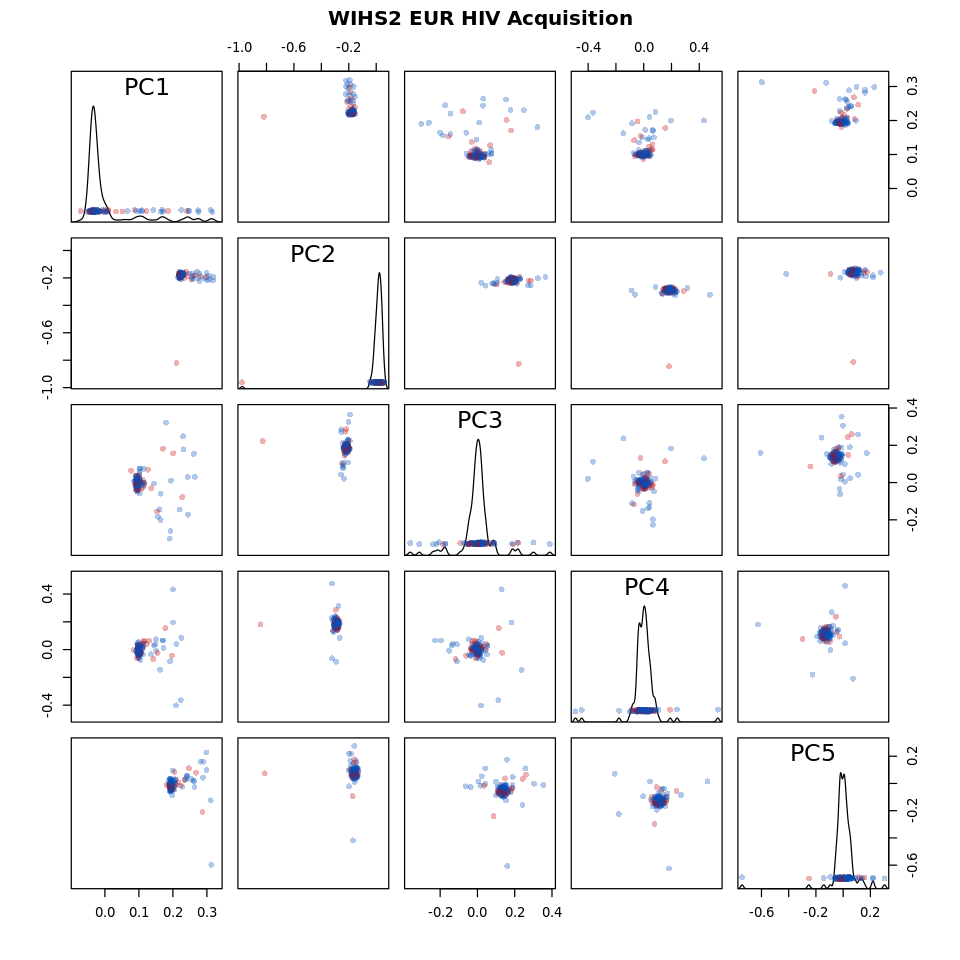

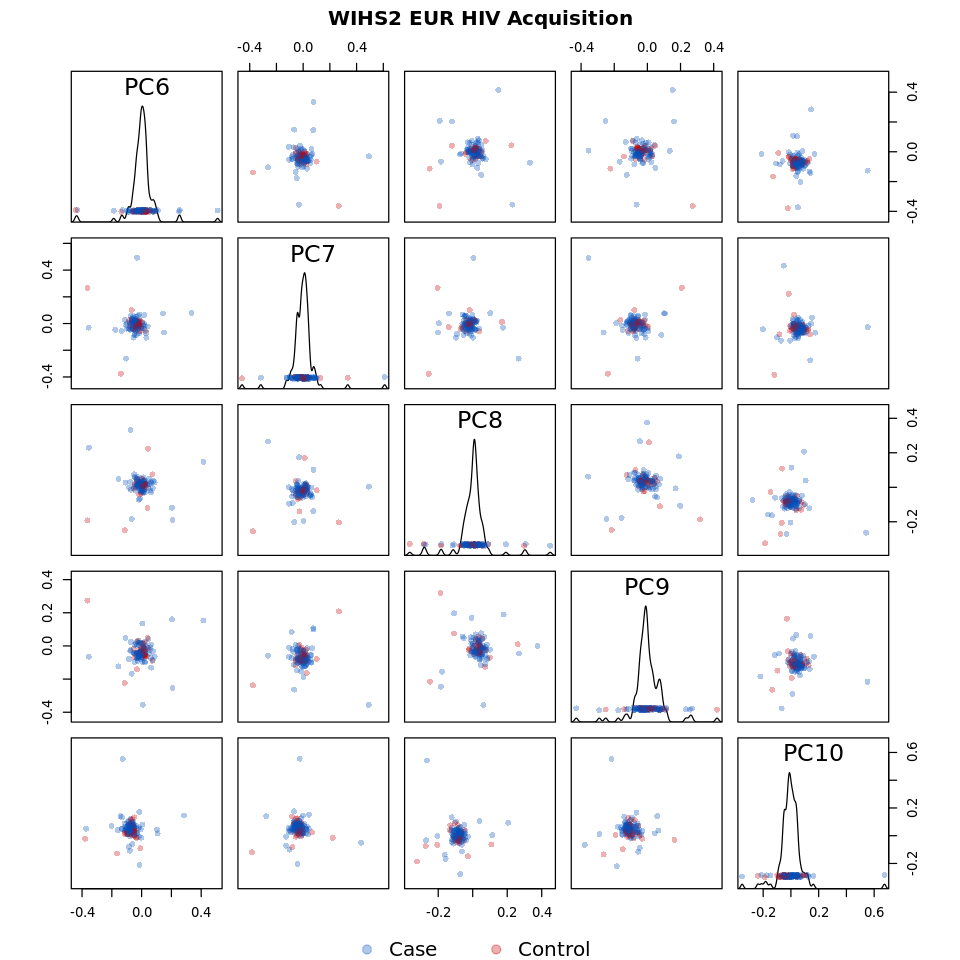

In [29]:
study_title <- "WIHS2 EUR HIV Acquisition"
pop <- "eur"
case_control <- TRUE # TRUE or FALSE
case_name <- "Case" # for legend    Note, if not case/control then just edit this one
control_name <- "Control"  # for legend   Note, if not case/control then just leave as is
case_col <- rgb(0,80,190,80, maxColorValue=255) #blue   Note, if not case/control then just edit this one
control_col <- rgb(200,0,0,80, maxColorValue=255) #red  Note, if not case/control then just leave as is


# EUR
plot.pca(case_control = case_control,
        case_col = case_col,
        control_col = control_col,
        df_evec = eur_evec)



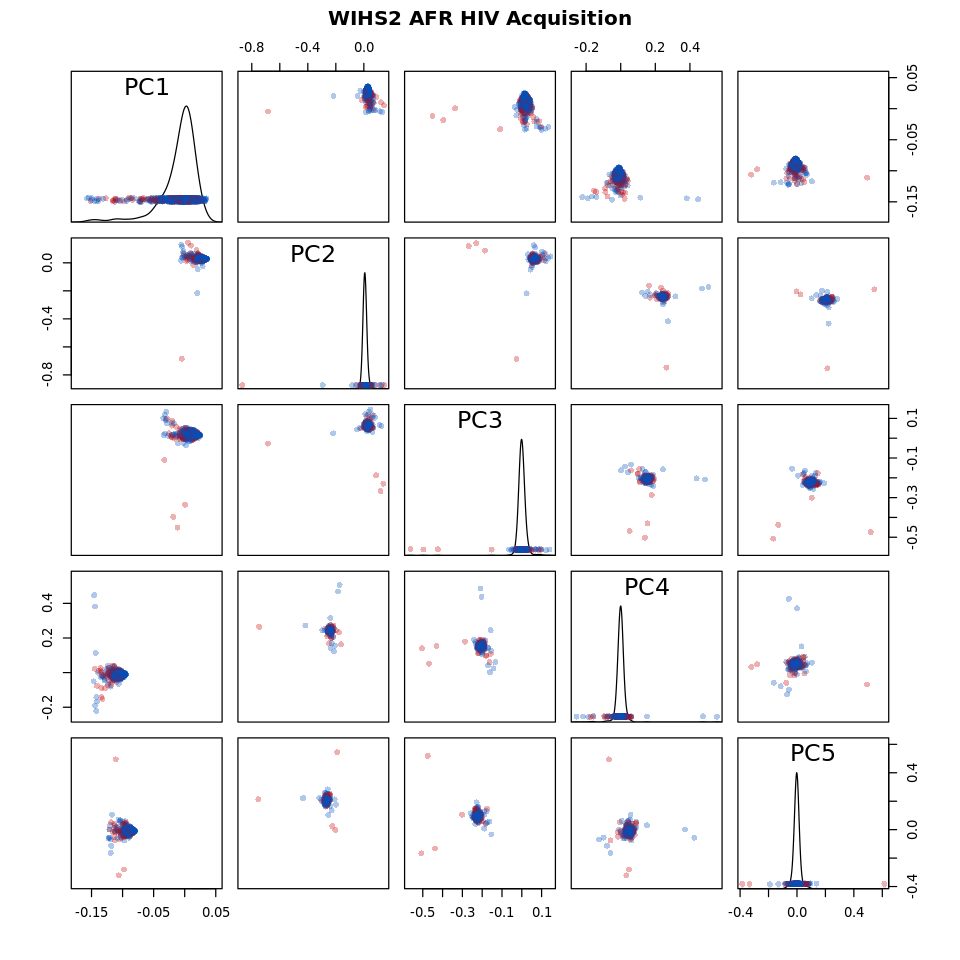

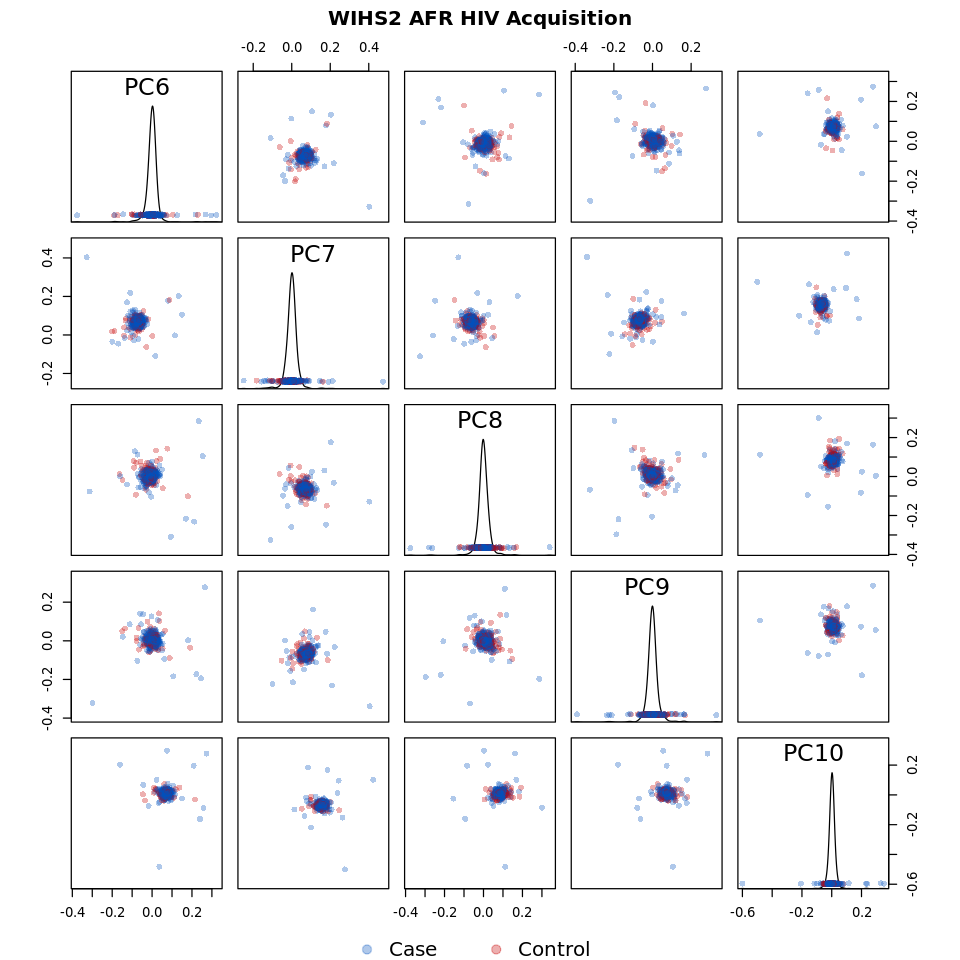

In [30]:
study_title <- "WIHS2 AFR HIV Acquisition"
pop <- "afr"
case_control <- TRUE # TRUE or FALSE
case_name <- "Case" # for legend    Note, if not case/control then just edit this one
control_name <- "Control"  # for legend   Note, if not case/control then just leave as is
case_col <- rgb(0,80,190,80, maxColorValue=255) #blue   Note, if not case/control then just edit this one
control_col <- rgb(200,0,0,80, maxColorValue=255) #red  Note, if not case/control then just leave as is


# AFR
plot.pca(case_control = case_control,
        case_col = case_col,
        control_col = control_col,
        df_evec = afr_evec)


### PC Selection

In [32]:
### PC Selection ###
## R functions, DO NOT ALTER THIS CODE ##
create.pedfile <- function(phen_file, pca_file, phenotype, sex_var, covariates, study, ancestry, final_name){
    
    # INPUT:
    # phen_file - phenotype file input of the format "fid iid fatid matid sex age-cov other-cov phentype-name"
    
    # phenotype file
    pheno_data <- read.delim(phen_file, sep="")
    pca_data <- read.delim(pca_file, sep="")
    other_pedcols <- c("fid", "iid", "patid", "matid", sex_var)
    ped_width <- length(other_pedcols) + length(phenotype)
    ped_length <- nrow(pheno_data)
    ped_file <- data.frame(matrix(ncol=ped_width, nrow=ped_length))
    colnames(ped_file) <- c(other_pedcols, phenotype)
    ped_file[phenotype] <- pheno_data[phenotype]
    ped_file[sex_var] <- pheno_data[sex_var]
    ped_file["fid"] <- pheno_data[1]
    ped_file["iid"] <- pheno_data[2]
    
    # master phenotype file & separate covariate file
    nphen_cols <- 15 + length(covariates)
    ncov_cols <- 14 + length(covariates)
    master_phen <- data.frame(matrix(ncol=nphen_cols, nrow=ped_length))
    covar_data <- data.frame(matrix(ncol=ncov_cols, nrow=ped_length))
    colnames(master_phen) <- c("fid", "iid", "patid", "matid", covariates, phenotype,
                             "PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")
    colnames(covar_data) <- c("fid", "iid", "patid", "matid", covariates,
                             "PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10")
    
    master_phen[,1:4] <- ped_file[, 1:4]
    covar_data[,1:4] <- ped_file[, 1:4]
    for (i in covariates){
        master_phen[,i] <- pheno_data[,i]
        covar_data[,i] <- pheno_data[,i]
    }
    master_phen[,phenotype] <- ped_file[phenotype]
    
    master_phen[, (nphen_cols-9):nphen_cols] <- pca_data[,3:12]
    covar_data[, (ncov_cols-9):ncov_cols] <- pca_data[,3:12]
    
    write.table(master_phen, final_name, sep = "\t", row.names = F, quote=F)
    write.table(ped_file, paste(study,"_", ancestry, "_phen.ped", sep=""), sep = "\t", row.names = F, quote=F)
    write.table(covar_data, paste(study,"_", ancestry, "_cov.ped", sep=""), sep = "\t", row.names = F, quote=F)
} # end function

regression.analysis <- function(cov_file, phen_file, phenotype_name, model_type, ancestry, coded_01){
    options(stringsAsFactors=F)
    
    ancestry <- toupper(ancestry) # for graph titles
    cov_data <- read.delim(cov_file, sep="")
    phen_data <- read.delim(phen_file, sep="")
    pc_names <- paste0("PC", 1:10)
    merge_data <- merge(x=phen_data[,c("iid", phenotype_name)], y=cov_data[, c("iid", pc_names)], by="iid")
    
    model.str <- paste0(phenotype_name, "~", paste(pc_names, collapse=" + ")) 
    cat("MODEL FORMULA:\n\n", model.str, "\n")
    
    # Get model fits
    if (model_type=="continuous"){
        model_fit <- lm(formula=as.formula(model.str), data=merge_data)
        pve_calc <- "Mean Sq"
    }
    else if (model_type=="logistic"){
        if (!coded_01) {
            merge_data[,phenotype_name] <- merge_data[,phenotype_name] - 1
        }
        model_fit <- glm(formula=as.formula(model.str), data=merge_data, family=binomial(link="logit"))
        pve_calc <- "Deviance"
    }
    # Get sequential (type I) sum of squares
    anova_model <- anova(model_fit)
    
    # Calculate percent variance explained and sort
    variance_explained <- cbind(anova_model[pc_names,], 
                    PVE=round(anova_model[pc_names, pve_calc]/sum(anova_model[pc_names, pve_calc])*100, digits=2))
    pve_sorted <- variance_explained[order(variance_explained$PVE, decreasing=T),]
    
    # Output regression info
    cat(paste("\n\n================", ancestry,  "group ================\n"))
    summary(model_fit)
    pve_sorted
    
    # Percent Variance Explained Visualization
    options(repr.plot.width=13, repr.plot.height=5)

    # Set graphical parameters
    cex.factor <- 0.9
    barplot_ylim <- c(0, max(variance_explained$PVE)*1.2)

    pv_list <- vector(length = 10)
    total <- 0
    for (i in 1:nrow(pve_sorted)){
        pv_list[i] <- row.names(pve_sorted[i,])
        total <- total + pve_sorted[i, "PVE"]
        #print(total)
        if (total >= 75) break
    }

    topPCs <- pv_list[which(pv_list != "FALSE")]
    cat("Top PCs: ",topPCs, "\n")
    cat(paste("PVE:     ", total))

    # Visualize PVE
    par(mfrow=c(1,2))
    barplot(height=variance_explained$PVE, names.arg=rownames(variance_explained), beside=T, cex.names=cex.factor, 
            col="red3", border="red3", ylim=barplot_ylim, 
            main=paste(ancestry,"Percent Variance Explained"), ylab="PVE")
    plot(cumsum(variance_explained$PVE), type="b", main=paste(ancestry, "PVE Cumulative Sum"), ylab="PVE", 
         lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
    axis(side=1, at=c(1:10), labels=rownames(variance_explained), cex.axis=cex.factor)

    par(mfrow=c(1,2))
    barplot(height=pve_sorted$PVE, names.arg=rownames(pve_sorted), beside=T, cex.names=cex.factor, 
            col="red3", border="red3", ylim=barplot_ylim, main=paste(ancestry,"Percent Variance Explained (Sorted PCs)"), ylab="PVE")
    plot(cumsum(pve_sorted$PVE), type="b", main=paste(ancestry,"PVE Cumulative Sum (Sorted PCs)"), ylab="PVE", 
         lwd=2, col="red3", pch=17, xaxt="n", xlab="", ylim=c(0,100))
    axis(side=1, at=c(1:10), labels=rownames(pve_sorted), cex.axis=cex.factor)
}

MODEL FORMULA:

 status~PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 


================ AFR group ================
Top PCs:  PC10 PC7 PC4 PC5 
PVE:      95.94

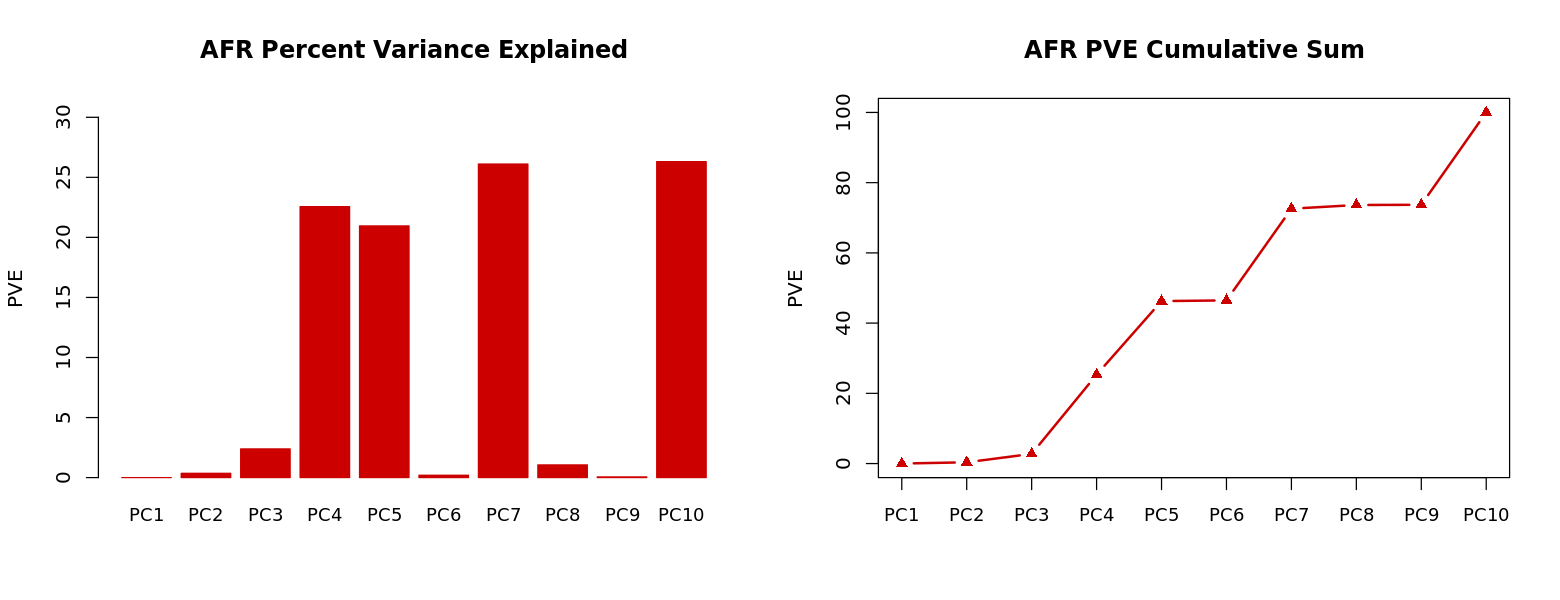

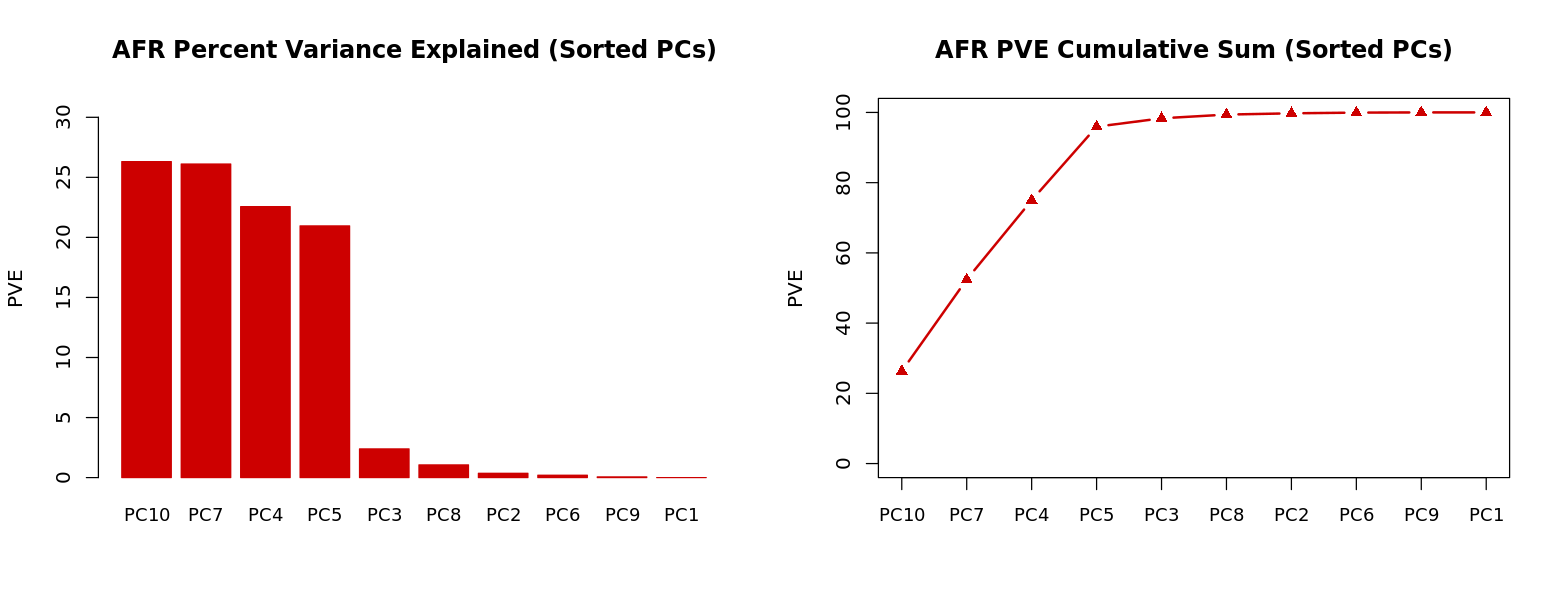

In [36]:
## AFR

study <- "wihs2_hiv_acquisition" # for file naming
ancestry <- "afr" # eur, afr, or amr

## variable information from phenotype file ($study_$an_phenotype_table.txt)
phenotype <- "status" 
sex_var <-  "sex" 
covs <- c(sex_var, "ageatbl") # add other covariates

phen_file <- "wihs2_afr_hiv_status_ageatbl.tsv"
final_name <- "wihs2_afr_hiv_status_ageatbl_pcs.tsv"  # output phenotype file with merged pcs (separate ped files are created too)
pca_file <- "afr_ld_pruned_top10_eigenvecs.txt"

model_type <- "logistic" # continuous or logistic (if log then must be coded 0 or 1)
coded_01 <- TRUE  # TRUE or FALSE. Are case/controls coded as 0's and 1's? (FALSE if coded as 1's and 2's)
####################################################################################################
####################################################################################################

cov2 <- paste(study, ancestry, "cov.ped", sep="_")
phen2 <- paste(study, ancestry, "phen.ped", sep="_")

create.pedfile(phen_file=phen_file, pca_file=pca_file, phenotype=phenotype,
               sex_var=sex_var, covariates=covs, study=study, ancestry=ancestry, 
               final_name=final_name)
regression.analysis(cov_file=cov2, phen_file=phen2,
                    phenotype_name=phenotype, model_type=model_type,
                    ancestry=ancestry,
                    coded_01)


MODEL FORMULA:

 status~PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 


================ EUR group ================
Top PCs:  PC6 PC10 PC9 
PVE:      77.76

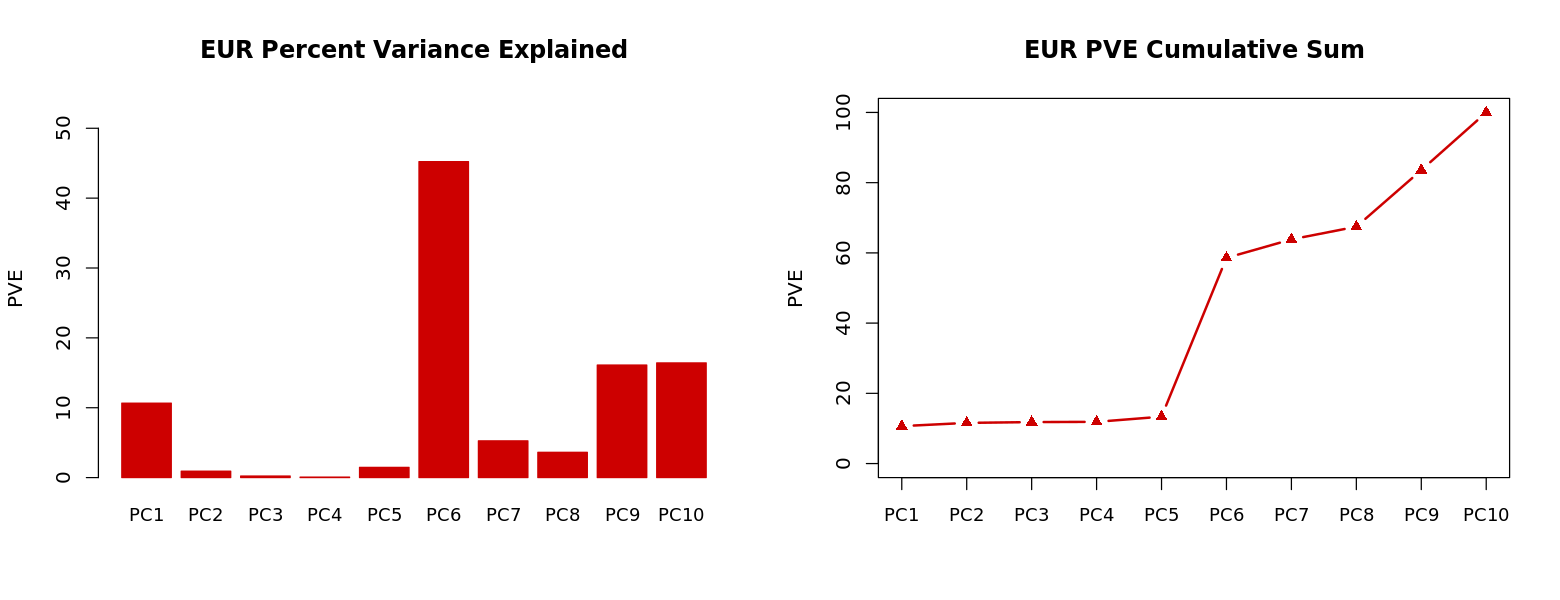

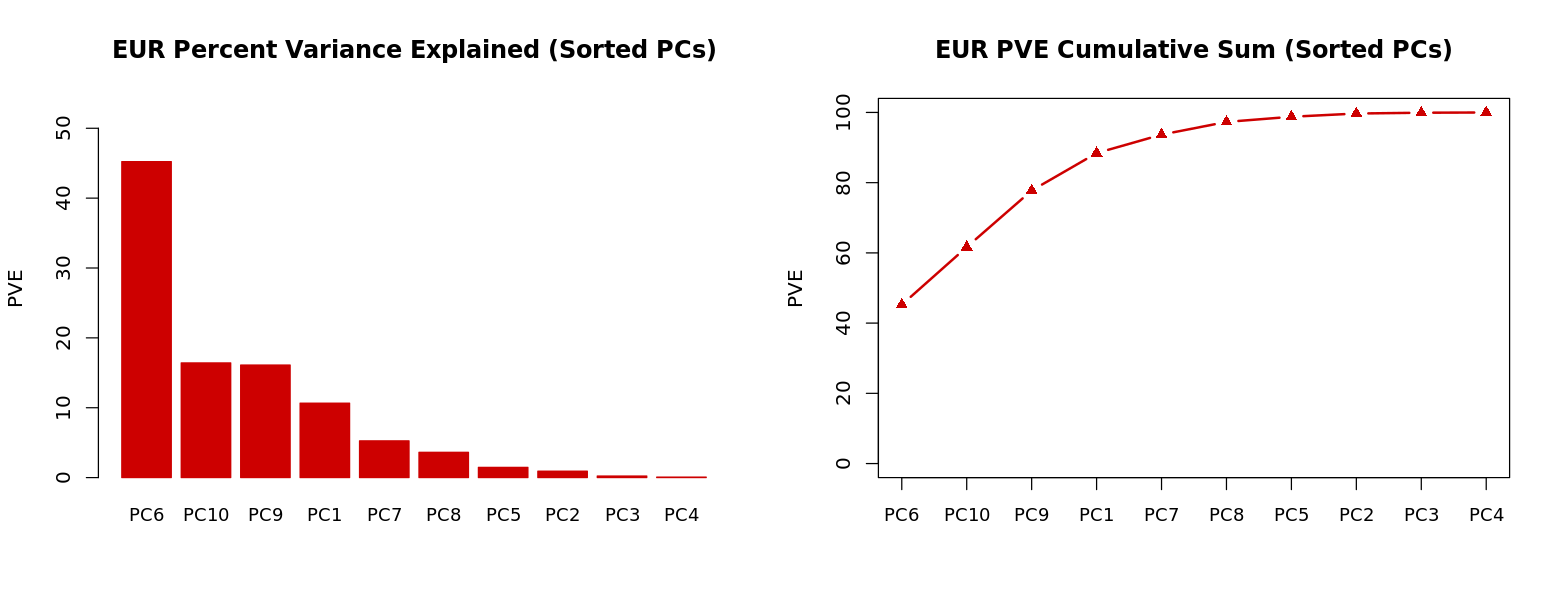

In [37]:
## EUR

study <- "wihs2_hiv_acquisition" # for file naming
ancestry <- "eur" # eur, afr, or amr

## variable information from phenotype file ($study_$an_phenotype_table.txt)
phenotype <- "status" 
sex_var <-  "sex" 
covs <- c(sex_var, "ageatbl") # add other covariates

phen_file <- "wihs2_eur_hiv_status_ageatbl.tsv"
final_name <- "wihs2_eur_hiv_status_ageatbl_pcs.tsv"  # output phenotype file with merged pcs (separate ped files are created too)
pca_file <- "eur_ld_pruned_top10_eigenvecs.txt"

model_type <- "logistic" # continuous or logistic (if log then must be coded 0 or 1)
coded_01 <- TRUE  # TRUE or FALSE. Are case/controls coded as 0's and 1's? (FALSE if coded as 1's and 2's)
####################################################################################################
####################################################################################################

cov2 <- paste(study, ancestry, "cov.ped", sep="_")
phen2 <- paste(study, ancestry, "phen.ped", sep="_")

create.pedfile(phen_file=phen_file, pca_file=pca_file, phenotype=phenotype,
               sex_var=sex_var, covariates=covs, study=study, ancestry=ancestry, 
               final_name=final_name)
regression.analysis(cov_file=cov2, phen_file=phen2,
                    phenotype_name=phenotype, model_type=model_type,
                    ancestry=ancestry,
                    coded_01)


In [ ]:
mkdir /home/jesse/Projects/hiv/gwas/wihs2/data/0001/phenotype/final/

mv /home/jesse/Projects/hiv/gwas/wihs2/data/0001/phenotype/processing/wihs2_eur_hiv_status_ageatbl_pcs.tsv \
    /home/jesse/Projects/hiv/gwas/wihs2/data/0001/phenotype/final/
mv /home/jesse/Projects/hiv/gwas/wihs2/data/0001/phenotype/processing/wihs2_afr_hiv_status_ageatbl_pcs.tsv \
    /home/jesse/Projects/hiv/gwas/wihs2/data/0001/phenotype/final/

cd /home/jesse/Projects/hiv/gwas/wihs2/data/0001/phenotype/final
# map case/control from 0/1 to 1/2
awk 'NR==1{$7=$7+1} {print $0}' OFS="\t" wihs2_afr_hiv_status_ageatbl_pcs.tsv  >\
  tmp && mv tmp wihs2_afr_hiv_status_ageatbl_pcs.tsv
awk 'NR==1{$7=$7+1} {print $0}' OFS="\t" wihs2_eur_hiv_status_ageatbl_pcs.tsv  >\
  tmp && mv tmp wihs2_eur_hiv_status_ageatbl_pcs.tsv

#upload to S3
aws s3 cp wihs2_afr_hiv_status_ageatbl_pcs.tsv s3://rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype/afr/
aws s3 cp wihs2_eur_hiv_status_ageatbl_pcs.tsv s3://rti-hiv/gwas/wihs2/data/acquisition/0001/phenotype/eur/

## Analysis Workflow

In [ ]:
mkdir -p /shared/rti-hiv/gwas/wihs2/results/hiv_acquisition/0001/{afr,eur}

## Cloning this repo and biocloud_wdl_tools submodule together
cd /shared/
git clone --recurse-submodules https://github.com/RTIInternational/biocloud_gwas_workflows.git

# pull for any updates
cd /shared/biocloud_gwas_workflows
git pull
git submodule update --init --recursive


In [ ]:
# edit variables
project="rti-hiv"
phen=acquisition
study=wihs2
ancestry=eur
version=0001

# Create wf config file for afr, amr, and eur
mkdir -p /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/
cd /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/

cp /shared/biocloud_gwas_workflows/association_testing/rvtests/tests/test_rvtests_gwas_wf.json \
    /shared/bioinformatics/methods/rti-hiv/gwas/${study}/results/${phen}/0001/${ancestry}_assoc_wf.json

# Modify config settings manually with vim

# save commit 
mkdir -p /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/
cd /shared/biocloud_gwas_workflows/
git rev-parse HEAD > /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/git_hash.txt  
cd /shared/

# Zip biocloud_gwas_workflows repo
zip \
    --exclude=*/var/* \
    --exclude=*.git/* \
    --exclude=*/test/* \
    --exclude=*/.idea/* \
    -r /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip \
    biocloud_gwas_workflows/

cd /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/

# note to opens the listening port to the large cromwell server in another window
# ssh -i ~/.ssh/gwas_rsa -L localhost:8000:localhost:8000 ec2-user@18.212.159.244

# Submit wf
curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@/shared/biocloud_gwas_workflows/association_testing/rvtests/rvtests_gwas_wf.wdl" \
    -F "workflowInputs=@/shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}_assoc_wf.json" \
    -F "workflowDependencies=@/shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip"
# AFR Job ID: 36b1e23b-58bf-4d71-9eac-a1da52120d4b
# EUR Job ID: 09b92b05-8218-4b72-84f4-da433f90bbb9 (no chrX)

# rsq 0.3 and 0.8
{"id":"8b871700-9e9b-4ba3-b7bc-af7a11ad50fb","status":"Submitted"}ec2-user@ip-172-31-20-229:afr$
#{"id":"f349dbc6-c84a-4aaa-94ed-3ad1d95b6645","status":"Submitted"}ec2-user@ip-172-31-20-229:eur$ 

### Process results

In [4]:
%%bash 

afr_id="8b871700-9e9b-4ba3-b7bc-af7a11ad50fb"
#eur_id=""
#amr_id=""

declare -A gwas_array
gwas_array[afr]="$afr_id" 
#gwas_array[eur]="$eur_id"
#gwas_array[amr]="$amr_id"
  
study="wihs2"
phen="acquisition"
version="0001"
project="hiv"




for ancestry in ${!gwas_array[@]}; do
    jobs=${gwas_array[$ancestry]}
    mkdir -p ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    cd ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    
    #Download output from Swagger UI.
    curl -X GET "http://localhost:8000/api/workflows/v1/$jobs/outputs" -H "accept: application/json" \
        > final_outputs_${jobs}.json

# note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o
        
with open('final_outputs_' + "$jobs" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(outputs[key])
                os.system(message)
EOF
                
    # Rename files
    for file in $(aws s3 ls s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
        finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
        
        aws s3 mv s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$file \
                  s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$finalFile
    done
done

copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/8b871700-9e9b-4ba3-b7bc-af7a11ad50fb/call-cat_sumstats/wihs2_afr.rvtests.MetaAssoc.tsv to s3://rti-hiv/gwas/wihs2/results/acquisition/0001/afr/wihs2_afr.rvtests.MetaAssoc.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/8b871700-9e9b-4ba3-b7bc-af7a11ad50fb/call-summarize_filtered_sumstats/shard-0/SUM.summarize_gwas_wf/b635c251-1316-4295-995f-4819a4a3fa06/call-filter_pvalue/wihs2_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/wihs2/results/acquisition/0001/afr/wihs2_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/8b871700-9e9b-4ba3-b7bc-af7a11ad50fb/call-summarize_filtered_sumstats/shard-1/SUM.summarize_gwas_wf/51e6e96b-fac9-40f2-939a-d2dab8230624/call-filter_pvalue/wihs2_afr.rvtests.MetaAssoc.rsq.0.8.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/wihs2/results/acquisition/0001/afr/wihs2_af

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9184  100  9184    0     0  43733      0 --:--:-- --:--:-- --:--:-- 44153


# WIHS3
Submit to TOPMed imputation server.

## Download from TOPMed

In [ ]:
ancestry=afr
study=wihs3
passW="vjsGu6zTe68LDN"
cd /shared/rti-hiv/gwas/wihs3/data/acquisition/0001/genotype/$ancestry


# download.file
####################################################################################################
####################################################################################################

# QC-results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/114118/d626c21f381a83a331380943842a2ebe | bash
# Logs
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/114125/3ee7108494603721562ba4b075fb8da7 | bash
# SNP Statistics
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/114122/721ad6e82a59065e64ec70ef28be5c85 | bash
# Imputation Results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/114124/8b2ec7d0c4213e094bbc1377952b105b | bash
####################################################################################################
####################################################################################################

# inflate chr results
for file in *zip; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name unzip.$study.$ancestry.$file \
        --script_prefix unzip.imputed.$study.$ancestry.data \
        --mem 3 \
        --nslots 2 \
        --priority 0 \
        --program unzip -P $passW $file 
done

# we can remove the original imputed data from MIS after we inflate the zip files
rm -rf *zip

# upload to s3
aws s3 sync . s3://rti-shared/shared_data/post_qc/wihs3/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001/$ancestry --quiet &


In [ ]:
ancestry=eur
study=wihs3
passW="X6kJKTh7LjuuLz"
cd /shared/rti-hiv/gwas/wihs3/data/acquisition/0001/genotype/$ancestry


# download.file
####################################################################################################
####################################################################################################

# QC-results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/115105/ef00e19cce1af0c5016b010e0043b1f5 | bash
# Logs
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/115112/995cc17f9a65d8f773352de081dca9ae | bash
# SNP Statistics
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/115109/1480ae7bd80fb970a701948d595ea20e | bash
# Imputation Results
curl -sL https://imputation.biodatacatalyst.nhlbi.nih.gov/get/115111/327048c88d03fd3bf70c706e2cc393cf | bash
####################################################################################################
####################################################################################################

# inflate chr results
for file in *zip; do
    /shared/bioinformatics/software/scripts/qsub_job.sh \
        --job_name unzip.$study.$ancestry.$file \
        --script_prefix unzip.imputed.$study.$ancestry.data \
        --mem 3 \
        --nslots 2 \
        --priority 0 \
        --program unzip -P $passW $file 
done

# we can remove the original imputed data from MIS after we inflate the zip files
rm -rf *zip

# upload to s3
aws s3 sync . s3://rti-shared/shared_data/post_qc/wihs3/genotype/array/imputed/minimac4_eagle2.4/topmed_r2/0001/$ancestry --quiet &


## Data Wrangle
The previous phenotype files for WIHS3 GWAS can be used after some edits.
`s3://rti-hiv/gwas/wihs3/data/phenotype/0001/final/wihs3_aa_hiv_age_sex_PC3+PC8+PC2.txt`
`s3://rti-hiv/gwas/wihs3/data/phenotype/0001/final/wihs3_ea_hiv_age_sex_PC9+PC7+PC2+PC10.txt`

In [ ]:
cd /shared/rti-hiv/gwas/wihs3/data/acquisition/0001/phenotype
aws s3 sync s3://rti-hiv/gwas/wihs3/data/phenotype/0001/final/ .
    
awk 'NR==1 { print "fid","iid","fatid","matid", "sex","age", "hiv_status","PC3","PC8","PC2" } 
  NR>1 {print $1,$1,"NA","NA",$4,$3,$2,$5,$6,$7}' \
  wihs3_aa_hiv_age_sex_PC3+PC8+PC2.txt > wihs3_afr_tmp.txt
    
awk 'NR==1 {print $0} NR > 1 {
  $7 = ($7 + 1)
  {print $0}}' wihs3_afr_tmp.txt > wihs3_afr_hiv_status_age_sex_pcs.txt

awk 'NR==1 { print "fid","iid","fatid","matid", "sex","age", "hiv_status","PC9","PC7","PC2", "PC10"} 
  NR>1 {print $1,$1,"NA","NA",$4,$3,$2,$5,$6,$7,$8}' \
  wihs3_ea_hiv_age_sex_PC9+PC7+PC2+PC10.txt > wihs3_eur_tmp.txt
    
awk 'NR==1 {print $0} NR > 1 {
  $7 = ($7 + 1)
  {print $0}}' wihs3_eur_tmp.txt > wihs3_eur_hiv_status_age_sex_pcs.txt


#convert to tab
awk '$1=$1 {print $0}' OFS="\t" wihs3_afr_hiv_status_age_sex_pcs.txt > wihs3_afr_hiv_status_age_sex_pcs.tsv
awk '$1=$1 {print $0}' OFS="\t" wihs3_eur_hiv_status_age_sex_pcs.txt > wihs3_eur_hiv_status_age_sex_pcs.tsv

# upload to S3
aws s3 cp wihs3_eur_hiv_status_age_sex_pcs.tsv s3://rti-hiv/gwas/wihs3/data/acquisition/0001/phenotype/
aws s3 cp wihs3_afr_hiv_status_age_sex_pcs.tsv s3://rti-hiv/gwas/wihs3/data/acquisition/0001/phenotype/

## Analysis Workflow

In [ ]:
# edit variables
project="rti-hiv"
phen=acquisition
study=wihs3
ancestry=eur
version=0001

## Cloning this repo and biocloud_wdl_tools submodule together
cd /shared/
git clone --recurse-submodules https://github.com/RTIInternational/biocloud_gwas_workflows.git

# pull for any updates
cd /shared/biocloud_gwas_workflows
git pull
git submodule update --init --recursive


In [ ]:
# Create wf config file for afr, amr, and eur
mkdir -p /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/
cd /shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/

cp /shared/biocloud_gwas_workflows/association_testing/rvtests/tests/test_rvtests_gwas_wf.json \
    /shared/bioinformatics/methods/rti-hiv/gwas/${study}/results/${phen}/0001/${ancestry}_assoc_wf.json

# Modify config settings manually with vim

# save commit 
mkdir -p /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/
cd /shared/biocloud_gwas_workflows/
git rev-parse HEAD > /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/git_hash.txt  
cd /shared/

# Zip biocloud_gwas_workflows repo
zip \
    --exclude=*/var/* \
    --exclude=*.git/* \
    --exclude=*/test/* \
    --exclude=*/.idea/* \
    -r /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip \
    biocloud_gwas_workflows/

cd /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/

# note to opens the listening port to the large cromwell server in another window
# ssh -i ~/.ssh/gwas_rsa -L localhost:8000:localhost:8000 ec2-user@18.212.159.244

# Submit wf
#curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
#    -F "workflowSource=@/shared/biocloud_gwas_workflows/association_testing/rvtests/rvtests_gwas_wf.wdl" \
#    -F "workflowInputs=@/shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}_assoc_wf.json" \
#    -F "workflowDependencies=@/shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip" > \
#        /shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/job_id.json

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@/shared/biocloud_gwas_workflows/association_testing/rvtests/rvtests_gwas_wf.wdl" \
    -F "workflowInputs=@/shared/bioinformatics/methods/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}_assoc_wf.json" \
    -F "workflowDependencies=@/shared/${project}/gwas/${study}/results/${phen}/${version}/${ancestry}/biocloud_gwas_workflows.zip"
# AFR Job ID: 9aa758b4-df18-4fd3-bb23-c519795f5bb7
# EUR Job ID: c84d6ad4-c04b-419a-b39c-348d8dd4b0d2

### Process results

In [3]:
%%bash 
declare -A gwas_array

afr_id="9aa758b4-df18-4fd3-bb23-c519795f5bb7"
eur_id="c84d6ad4-c04b-419a-b39c-348d8dd4b0d2"
#amr_id=""

gwas_array[afr]="$afr_id" 
gwas_array[eur]="$eur_id"
#gwas_array[amr]="$amr_id"
  
study="wihs3"
phen="acquisition"
version="0001"
project="hiv"




for ancestry in ${!gwas_array[@]}; do
    jobs=${gwas_array[$ancestry]}
    mkdir -p ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    cd ~/Projects/$project/gwas/$study/results/$phen/$version/$ancestry/
    
    #Download output from Swagger UI.
    curl -X GET "http://localhost:8000/api/workflows/v1/$jobs/outputs" -H "accept: application/json" \
        > final_outputs_${jobs}.json

# note that I had to unindent here to get it to run
python - <<EOF
import json
import os


def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o
        
with open('final_outputs_' + "$jobs" + '.json') as f:
    outputs = json.load(f)
    outputs = outputs["outputs"]
    for key in outputs:
        if (type(outputs[key]) == list):
            for value in traverse(outputs[key]):
                if (str(value)[0:2] == "s3"):
                    message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(value)
                    os.system(message)
        else:
            if (str(outputs[key])[0:2] == "s3"):
                message = "aws s3 cp {} s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/".format(outputs[key])
                os.system(message)
EOF
                
    # Rename files
    for file in $(aws s3 ls s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/ | grep ${study} | perl -lne '/(\S+)$/; print $1;'); do
        finalFile=$(echo $file | perl -spe 's/$study.+MetaAssoc/MetaScore/; s/.rsq./_rsq_gt_/; s/.sampleMAF./_sample_maf_gt_/; s/.popMAF./_pop_maf_gt_/; s/\.p\./_p_lt_/; s/.manhattan/_manhattan/; s/.qq/_qq/;' -- -study=$study)
        
        aws s3 mv s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$file \
                  s3://rti-${project}/gwas/${study}/results/$phen/$version/$ancestry/$finalFile
    done
done

copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/9aa758b4-df18-4fd3-bb23-c519795f5bb7/call-cat_sumstats/wihs3_afr.rvtests.MetaAssoc.tsv to s3://rti-hiv/gwas/wihs3/results/acquisition/0001/afr/wihs3_afr.rvtests.MetaAssoc.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/9aa758b4-df18-4fd3-bb23-c519795f5bb7/call-summarize_filtered_sumstats/shard-0/SUM.summarize_gwas_wf/6f2094b4-a1ab-44de-ac44-d8476a5c846e/call-filter_pvalue/wihs3_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/wihs3/results/acquisition/0001/afr/wihs3_afr.rvtests.MetaAssoc.rsq.0.3.sampleMAF.0.005.p.5.0E-4.tsv
copy: s3://rti-cromwell-output/cromwell-execution/rvtests_gwas_wf/9aa758b4-df18-4fd3-bb23-c519795f5bb7/call-summarize_filtered_sumstats/shard-1/SUM.summarize_gwas_wf/c62381db-1dea-4efc-b9ff-0c6fe0924c71/call-filter_pvalue/wihs3_afr.rvtests.MetaAssoc.rsq.0.8.sampleMAF.0.005.p.5.0E-4.tsv to s3://rti-hiv/gwas/wihs3/results/acquisition/0001/afr/wihs3_af

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9184  100  9184    0     0  32111      0 --:--:-- --:--:-- --:--:-- 32224
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9184  100  9184    0     0  26165      0 --:--:-- --:--:-- --:--:-- 26240
